In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.preprocessing import StandardScaler

In [76]:
seattle_calendar = pd.read_csv('seattle/calendar.csv')

In [77]:
seattle_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

First we get the indices of the first day of each month to be used for plotting later. 

In [78]:
seattle_calendar.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [79]:
one_listing = seattle_calendar[seattle_calendar.listing_id == 241032]
first_day_each_month = []
months = [f'0{i}' if i <10 else f'{i}' for i in range(1,12+1)]
for mon in months:
    for ind,date in zip(one_listing.date.index,one_listing.date):
        if date[-5:] == f'{mon}-01':
            first_day_each_month.append(ind)

looks like here when available is f there is no price. Let's make sure

In [5]:
(seattle_calendar.available=='f').sum() == seattle_calendar.price.isna().sum()

True

Looks like we are right.

Right now, it feels right to change t/f to True/False

In [6]:
seattle_calendar.available =seattle_calendar.available.map({'t':True,'f':False})

Next, we take a look at each listing individually and count the number of days where there are prices available

In [7]:
num_days = seattle_calendar[['listing_id','available']].groupby(by=['listing_id']).sum(columns = 'available')
num_days

available
listing_id           
3335              309
4291              365
5682              309
6606              365
7369               53
9419              365
9460               57
9531              180
9534              262
9596              363
10385             365
10695             365
11012             365
11411             365
13068             344
14386             316
15108             306
17951             307
19611             151
19619             137
19623             172
20868             358
20927             341
20928             334
23192             340
23356             327
23430             158
23919             317
24212             144
25002             308
...               ...
10234558          355
10235014            3
10235136            1
10247453          362
10248139           34
10249527            7
10250735            4
10252110           19
10262971          365
10265391          362
10267360           88
10272763          365
10273158          352
10274175          345
10279830          337
10281965          356
10292753          152
10295151          357
10299108           65
10299195           14
10309898          365
10310373          351
10318171          364
10319529            1
10331249          354
10332096          365
10334184          361
10339144            0
10339145          365
10340165          358

[3818 rows x 1 columns]

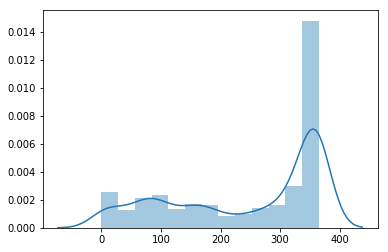

In [8]:
sns.distplot(num_days.available.tolist(), kde=True);

In [9]:
num_days.shape

(3818, 1)

We first analyze the data where the prices are available for the whole calendar year then will analyze the other data

In [10]:
num_days[num_days.available==365]

available
listing_id           
4291              365
6606              365
9419              365
10385             365
10695             365
11012             365
11411             365
26116             365
51826             365
52525             365
66540             365
74328             365
80188             365
82763             365
84030             365
86185             365
103908            365
103920            365
108468            365
132120            365
149489            365
170273            365
176678            365
178844            365
180939            365
202251            365
210316            365
215954            365
254340            365
264829            365
...               ...
9813231           365
9813684           365
9814376           365
9858690           365
9863312           365
9863457           365
9863565           365
9907337           365
9920856           365
9921445           365
9925458           365
9970609           365
9970805           365
9979329           365
10043487          365
10068879          365
10106055          365
10122924          365
10123910          365
10141859          365
10156116          365
10170577          365
10183490          365
10192213          365
10211928          365
10262971          365
10272763          365
10309898          365
10332096          365
10339145          365

[678 rows x 1 columns]

In [11]:
complete_id_list = num_days[num_days.available==365].index.tolist()

Next we pick the values that are not constant all year long

In [12]:
price_not_same = []
for id_ in  range(len(complete_id_list)):
    print(f'{id_}/{len(complete_id_list)}')
    listing = seattle_calendar[seattle_calendar.listing_id == complete_id_list[id_]]
    listing['price'] = listing['price'].map(lambda x: float(''.join(e for e in x if e.isalnum()))/100) ## from $## to ## 
    if listing.price.mean() != listing.iloc[0,3]:
        price_not_same.append(id_)   

0/678
1/678
2/678


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


3/678
4/678
5/678
6/678
7/678
8/678
9/678
10/678
11/678
12/678
13/678
14/678
15/678
16/678
17/678
18/678
19/678
20/678
21/678
22/678
23/678
24/678
25/678
26/678
27/678
28/678
29/678
30/678
31/678
32/678
33/678
34/678
35/678
36/678
37/678
38/678
39/678
40/678
41/678
42/678
43/678
44/678
45/678
46/678
47/678
48/678
49/678
50/678
51/678
52/678
53/678
54/678
55/678
56/678
57/678
58/678
59/678
60/678
61/678
62/678
63/678
64/678
65/678
66/678
67/678
68/678
69/678
70/678
71/678
72/678
73/678
74/678
75/678
76/678
77/678
78/678
79/678
80/678
81/678
82/678
83/678
84/678
85/678
86/678
87/678
88/678
89/678
90/678
91/678
92/678
93/678
94/678
95/678
96/678
97/678
98/678
99/678
100/678
101/678
102/678
103/678
104/678
105/678
106/678
107/678
108/678
109/678
110/678
111/678
112/678
113/678
114/678
115/678
116/678
117/678
118/678
119/678
120/678
121/678
122/678
123/678
124/678
125/678
126/678
127/678
128/678
129/678
130/678
131/678
132/678
133/678
134/678
135/678
136/678
137/678
138/678
139/678
140/678


In [13]:
len(price_not_same)

283

let's take a look at 20 random entries from those

58


/home/mmahrous/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


568
229
198
62
605
266
655
335
498
228
309
536
633
460
139
307
60
123
268


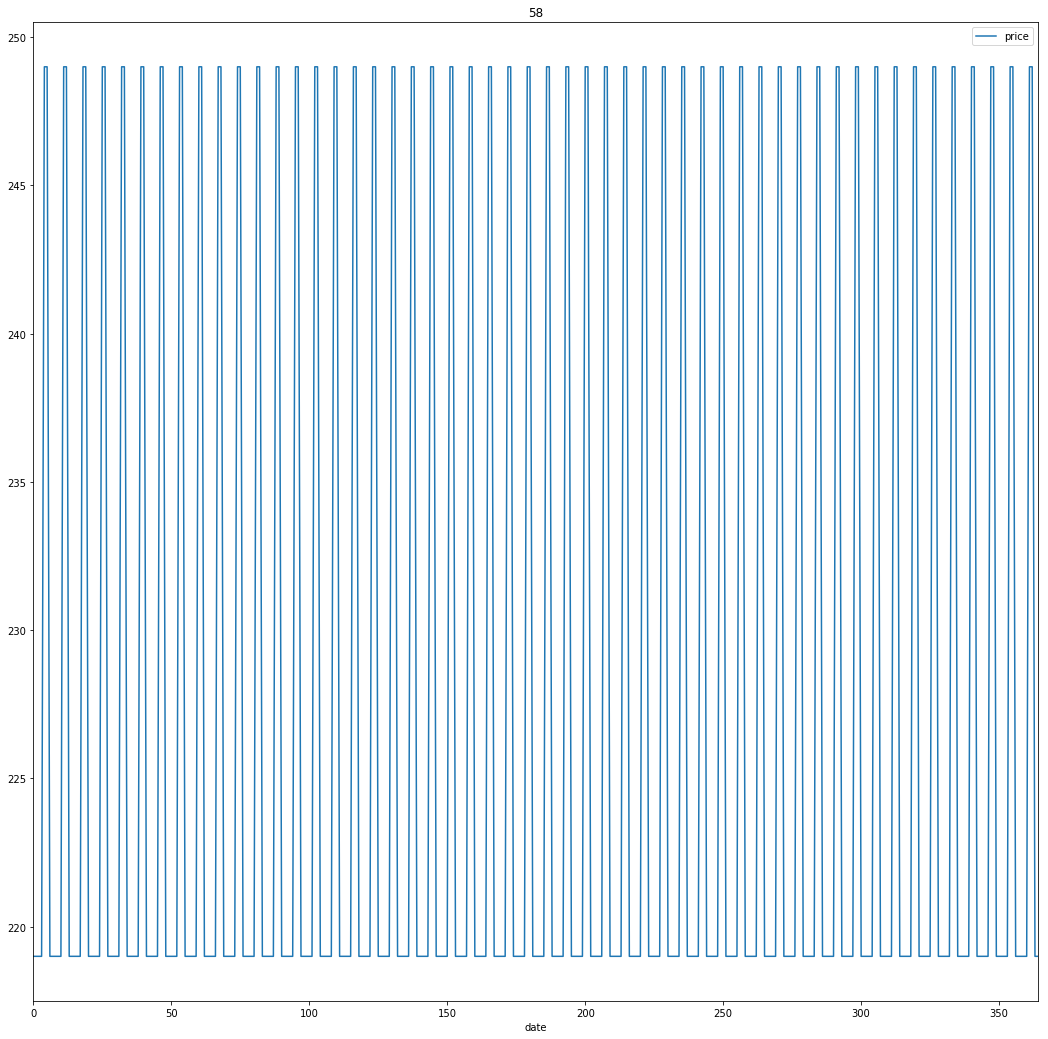

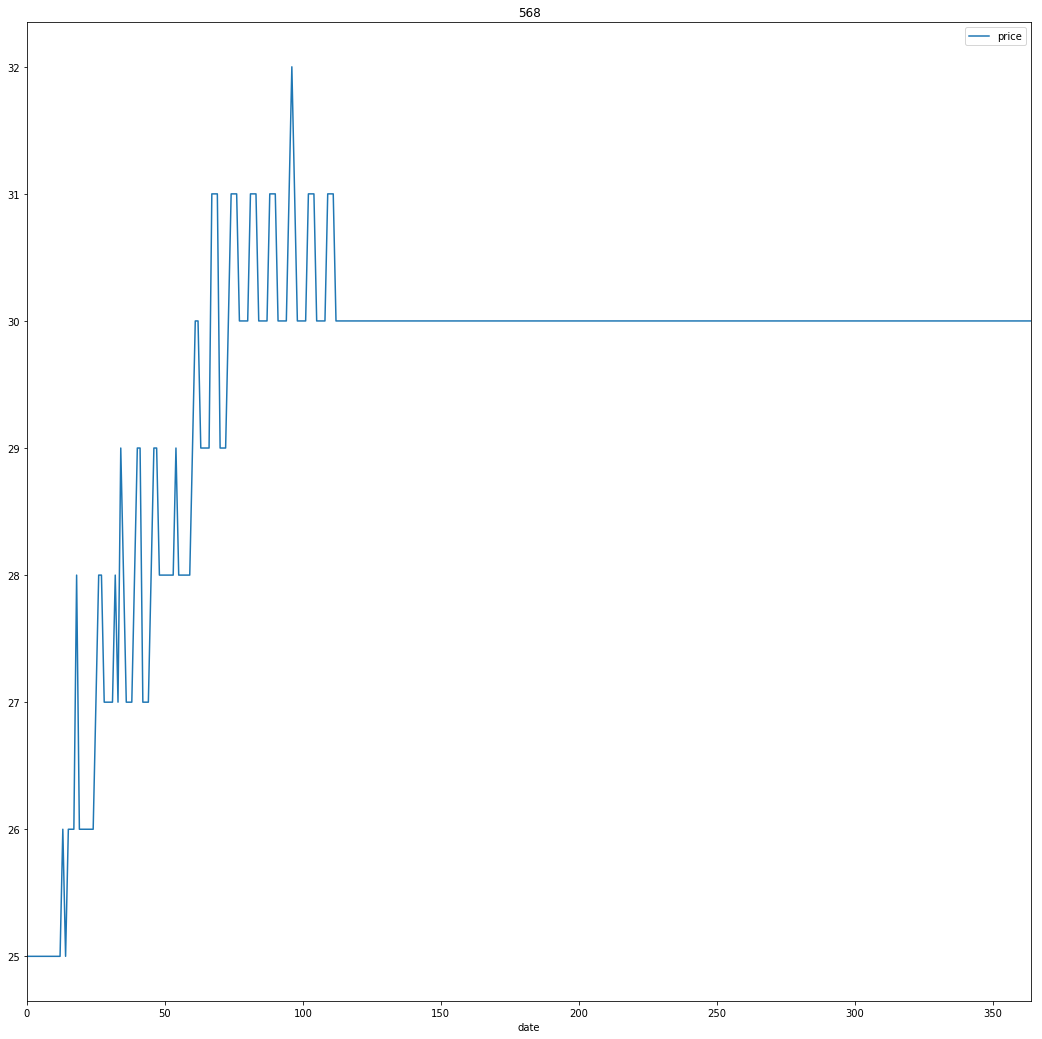

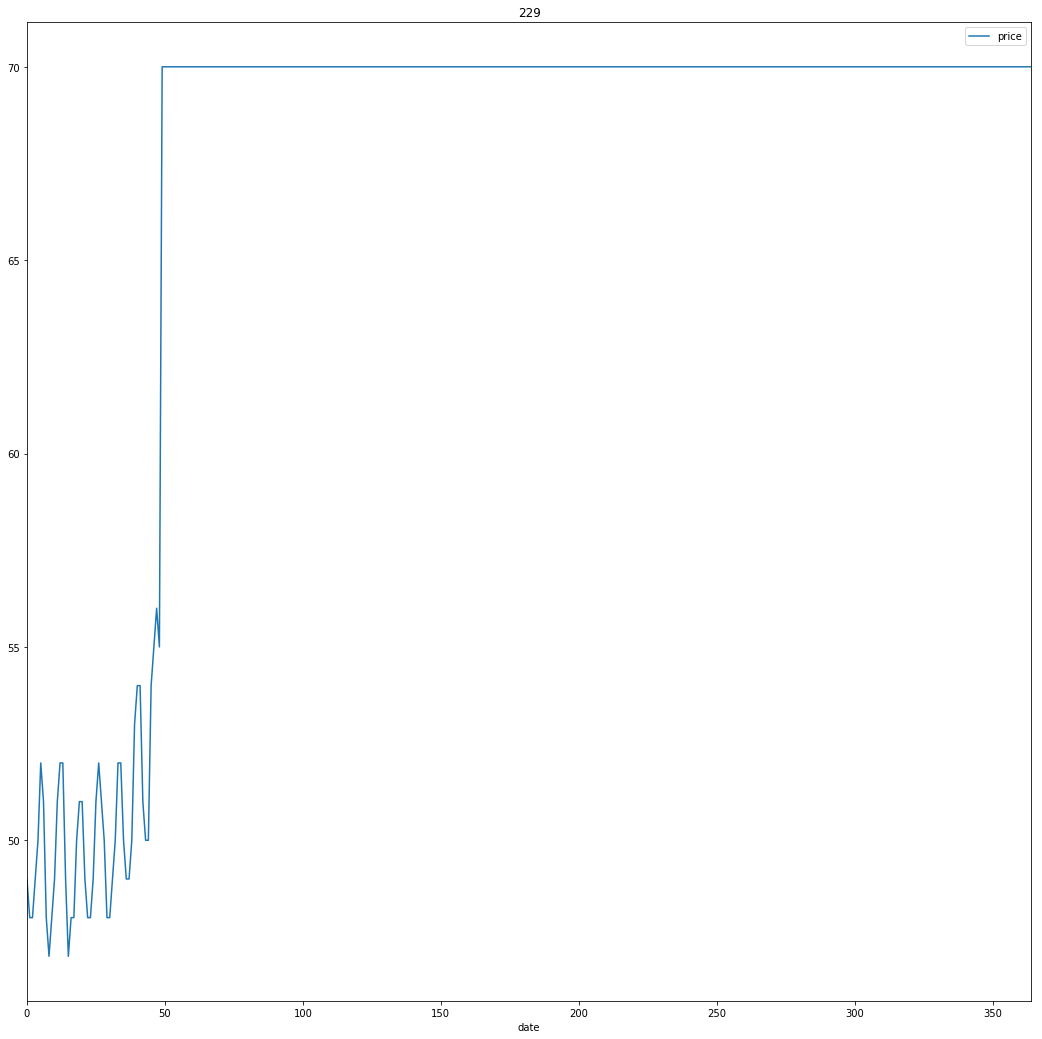

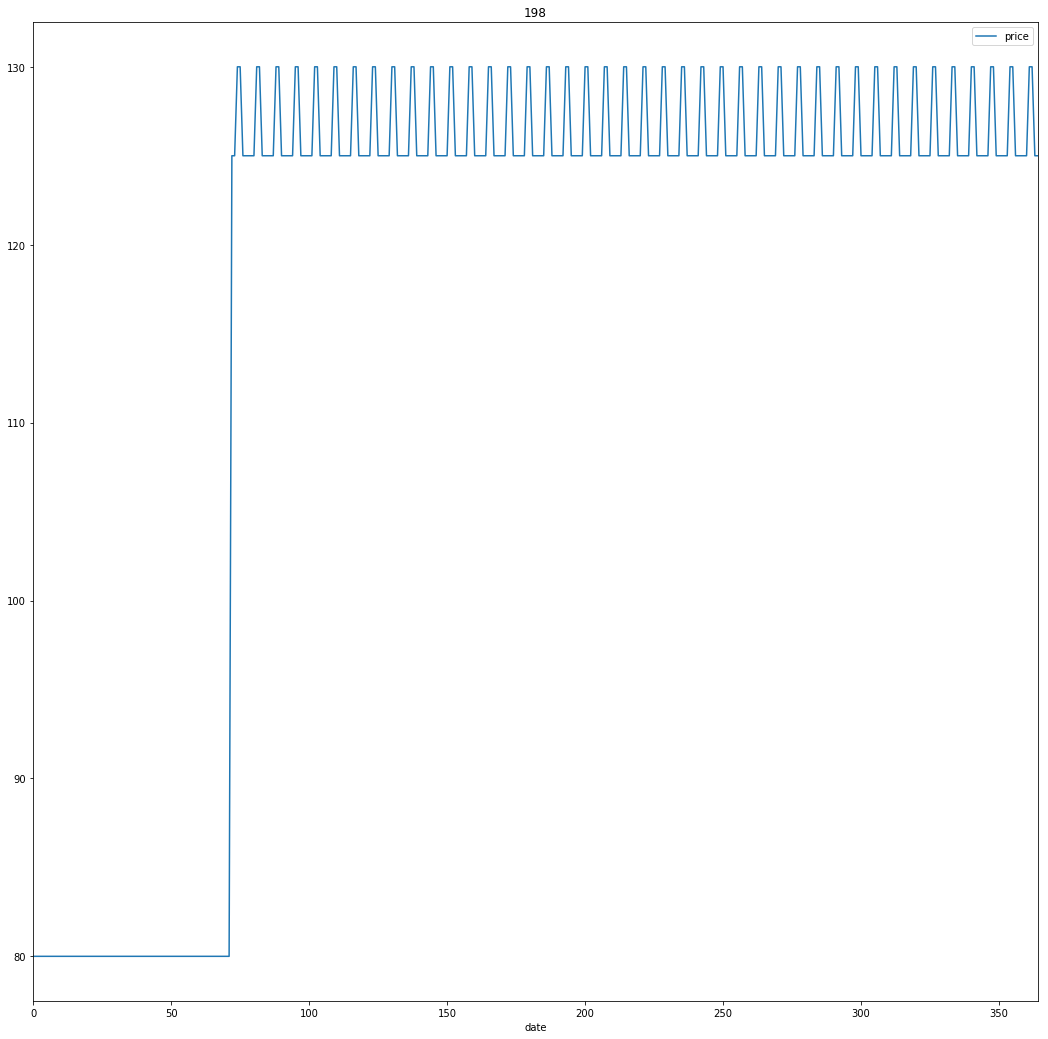

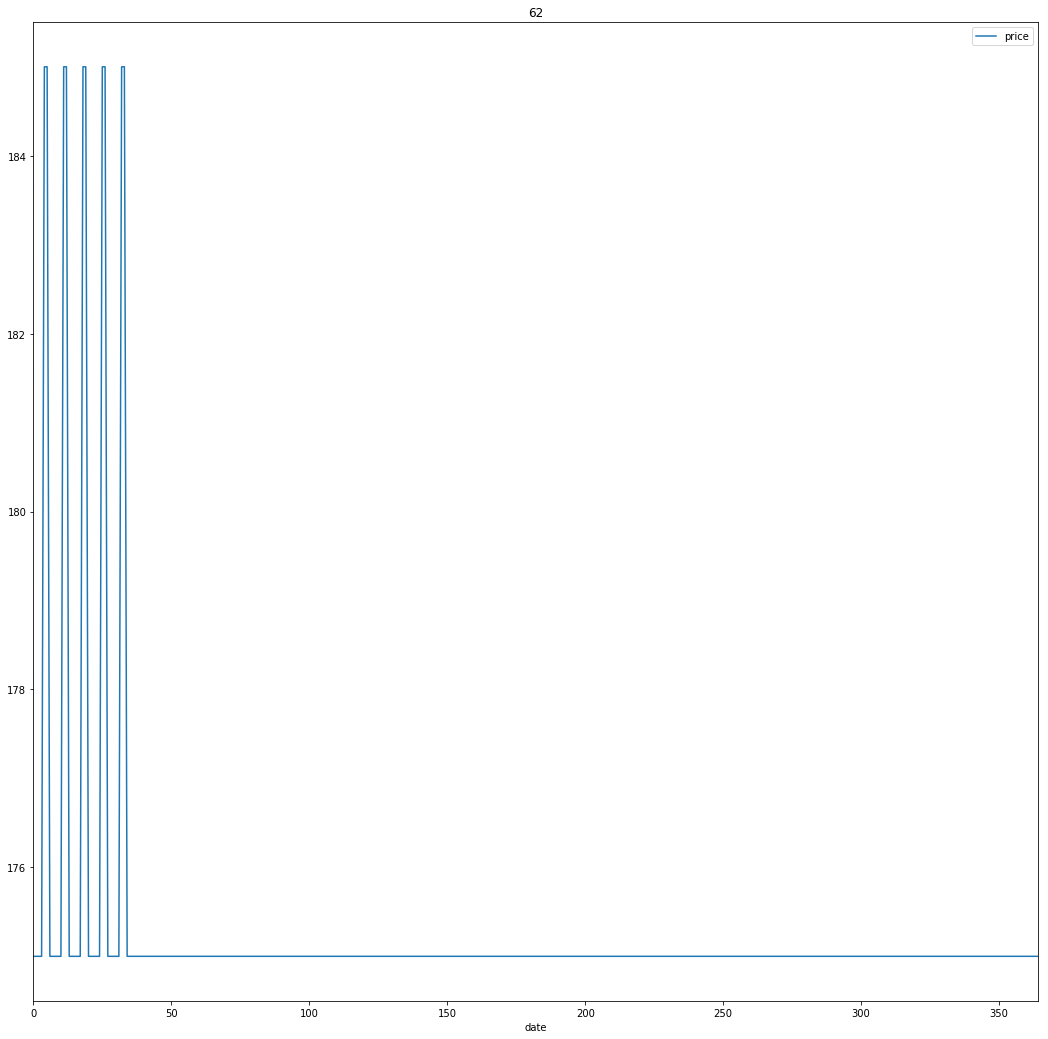

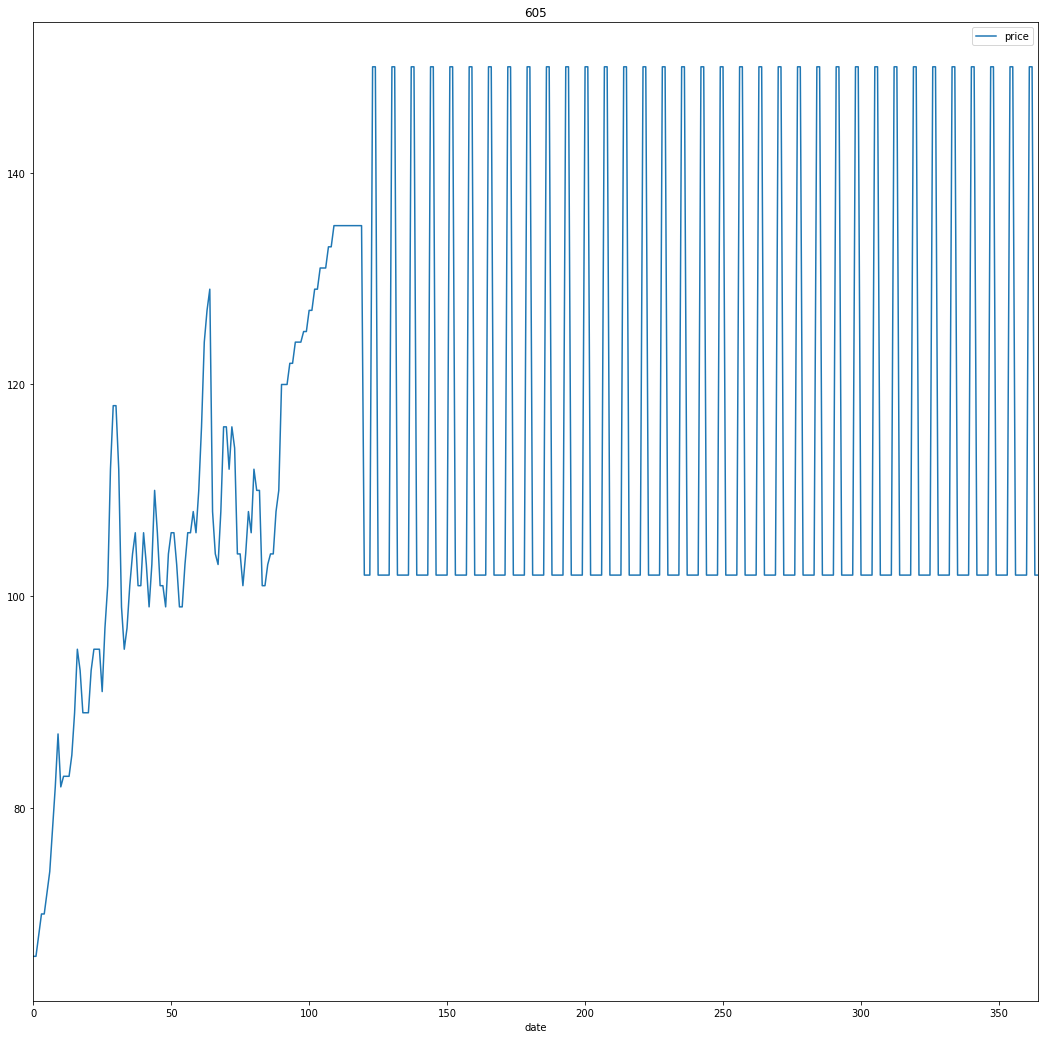

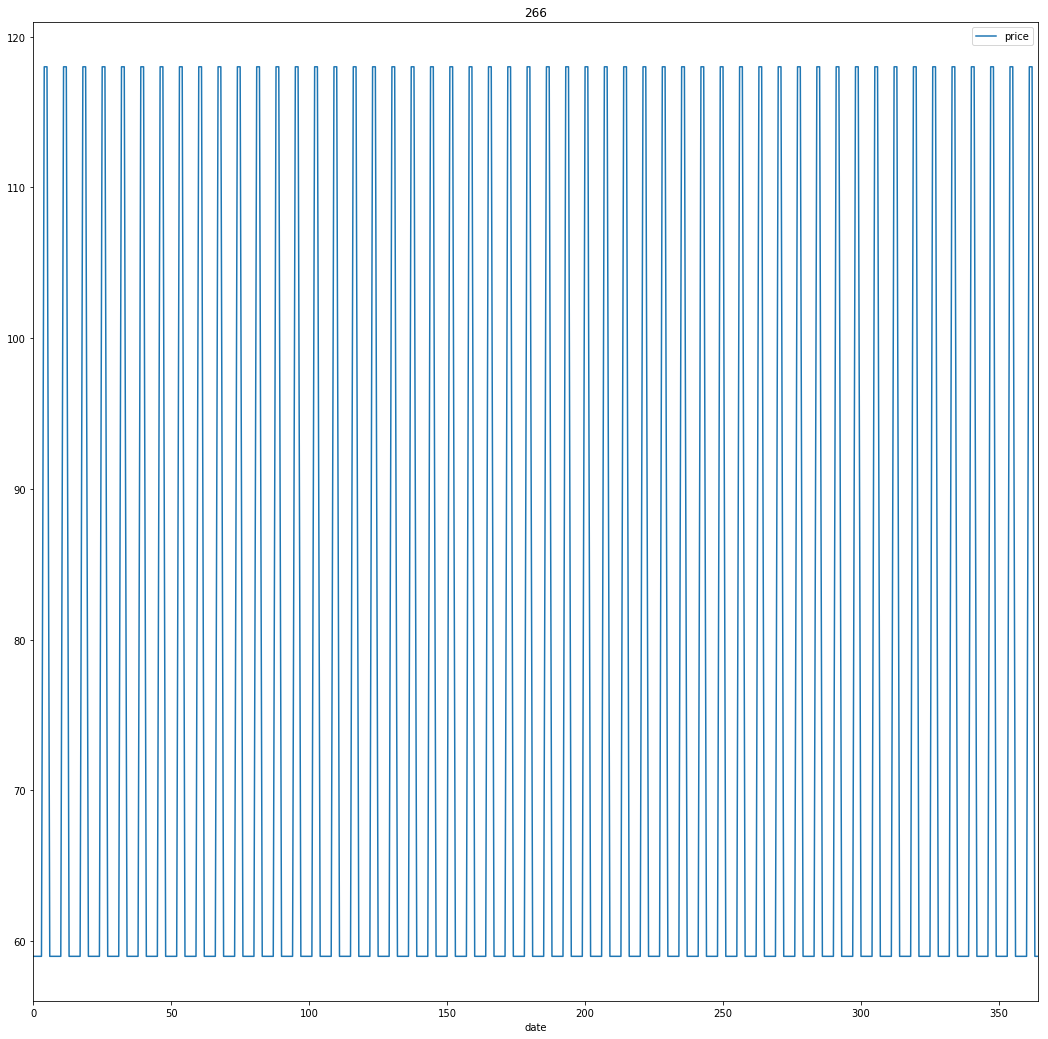

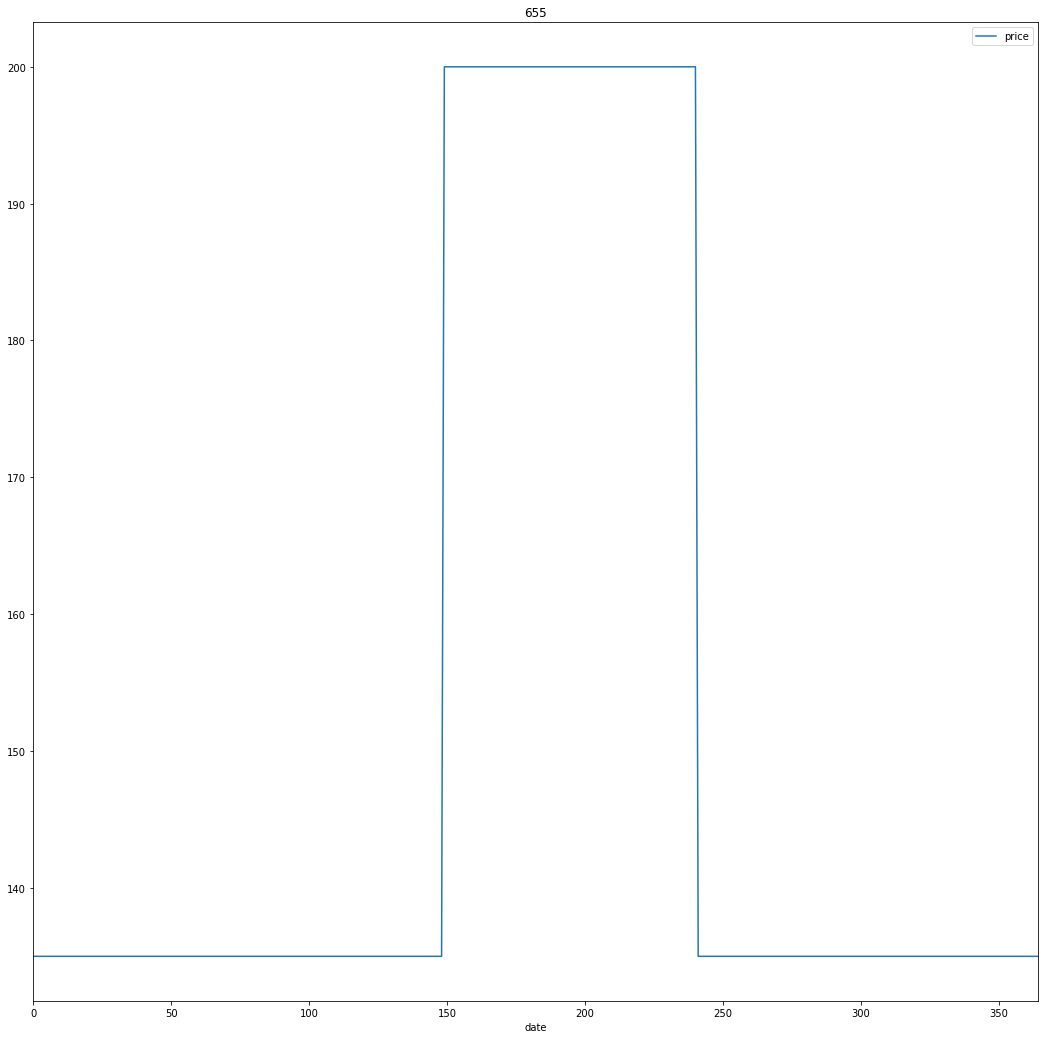

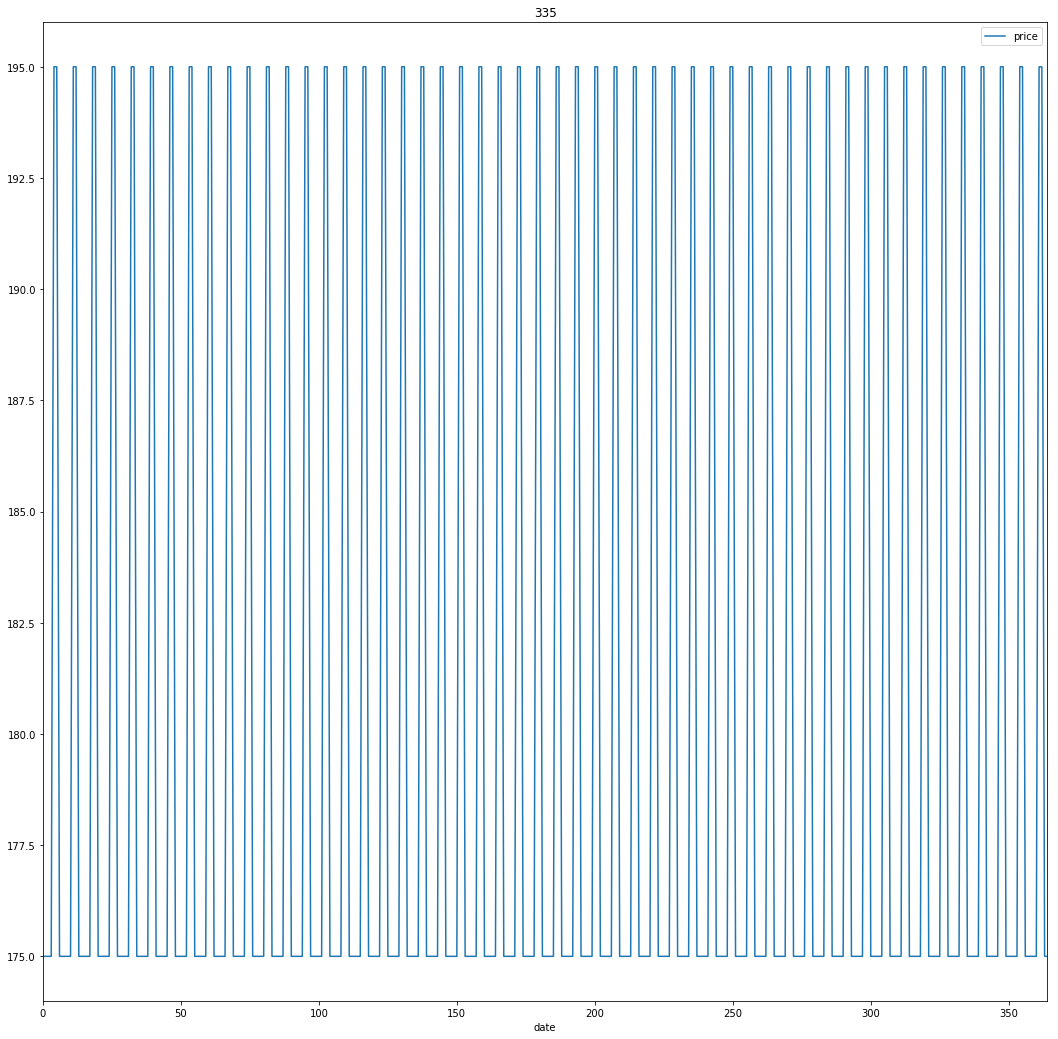

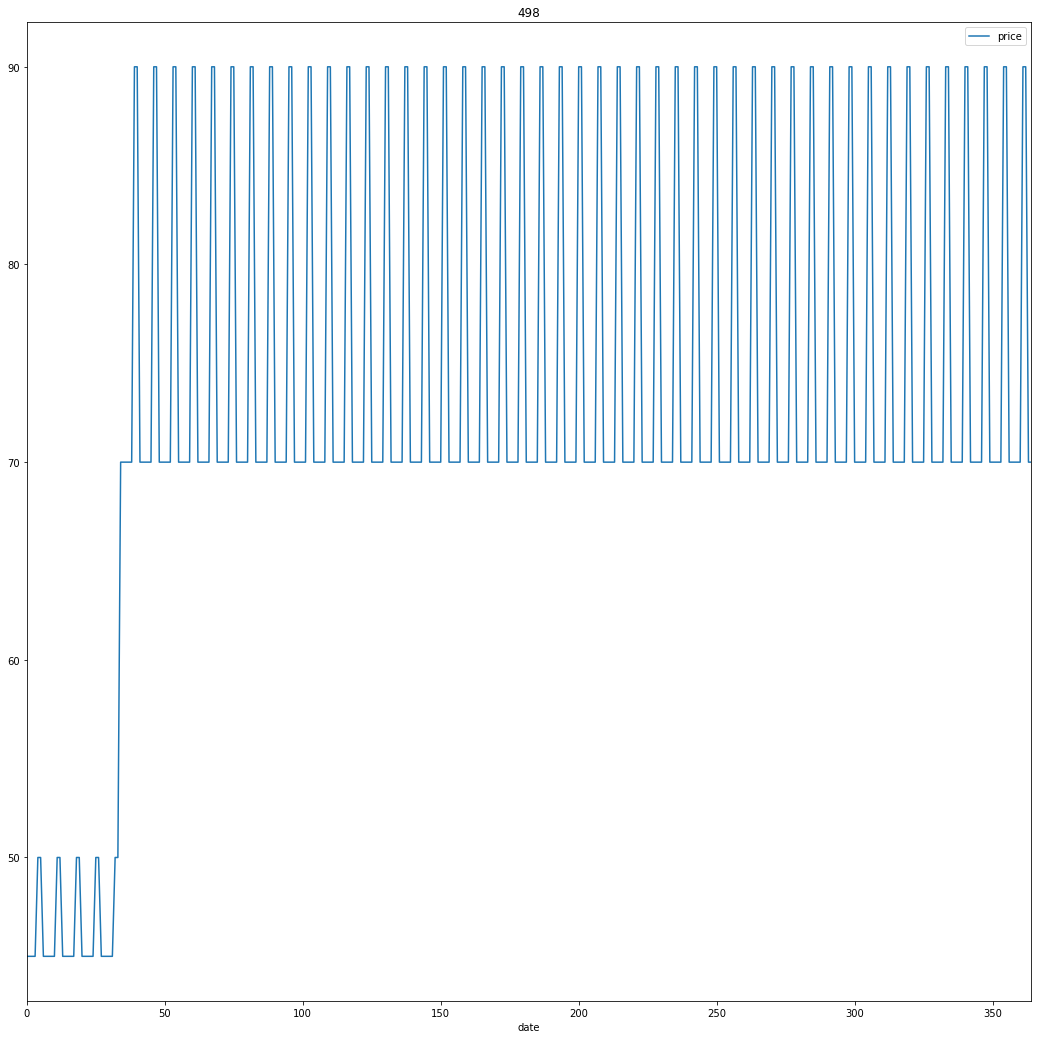

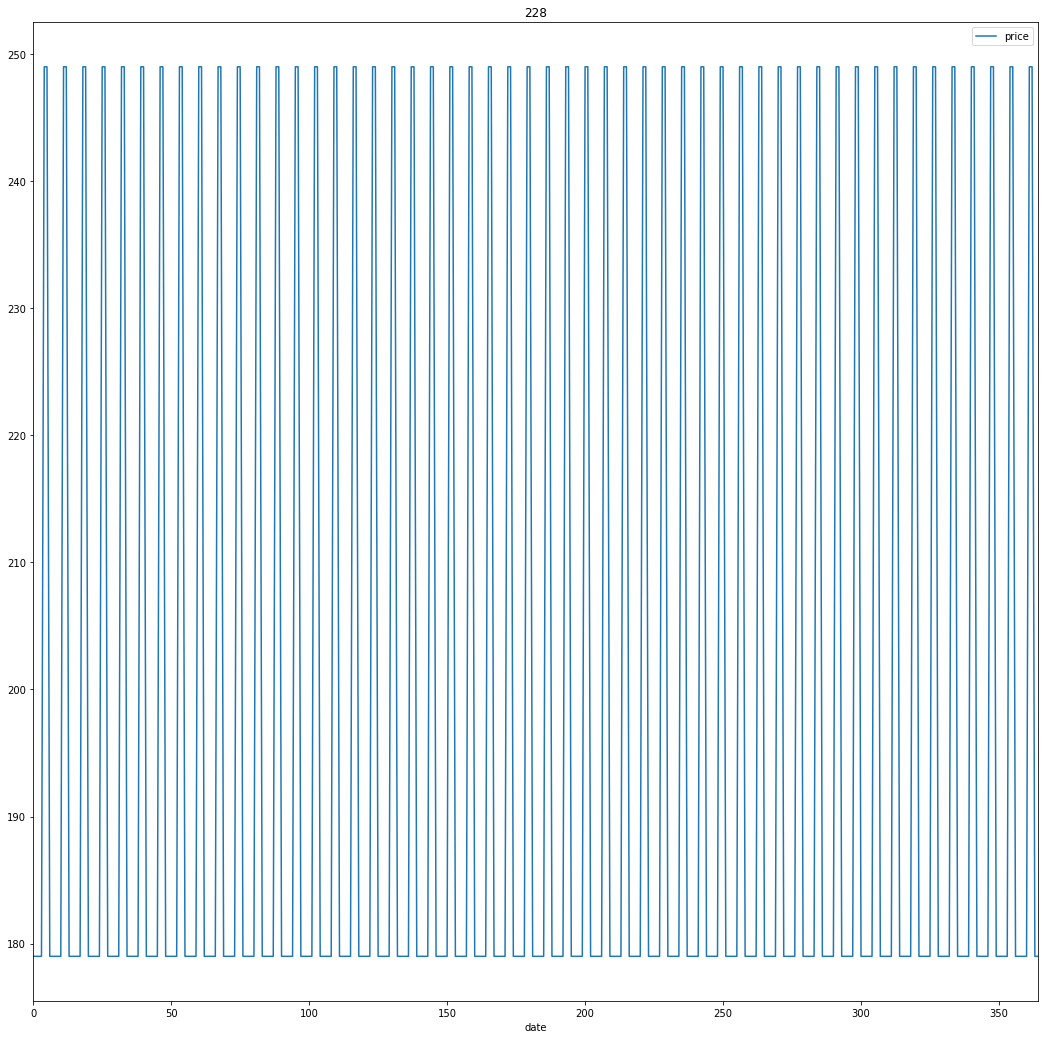

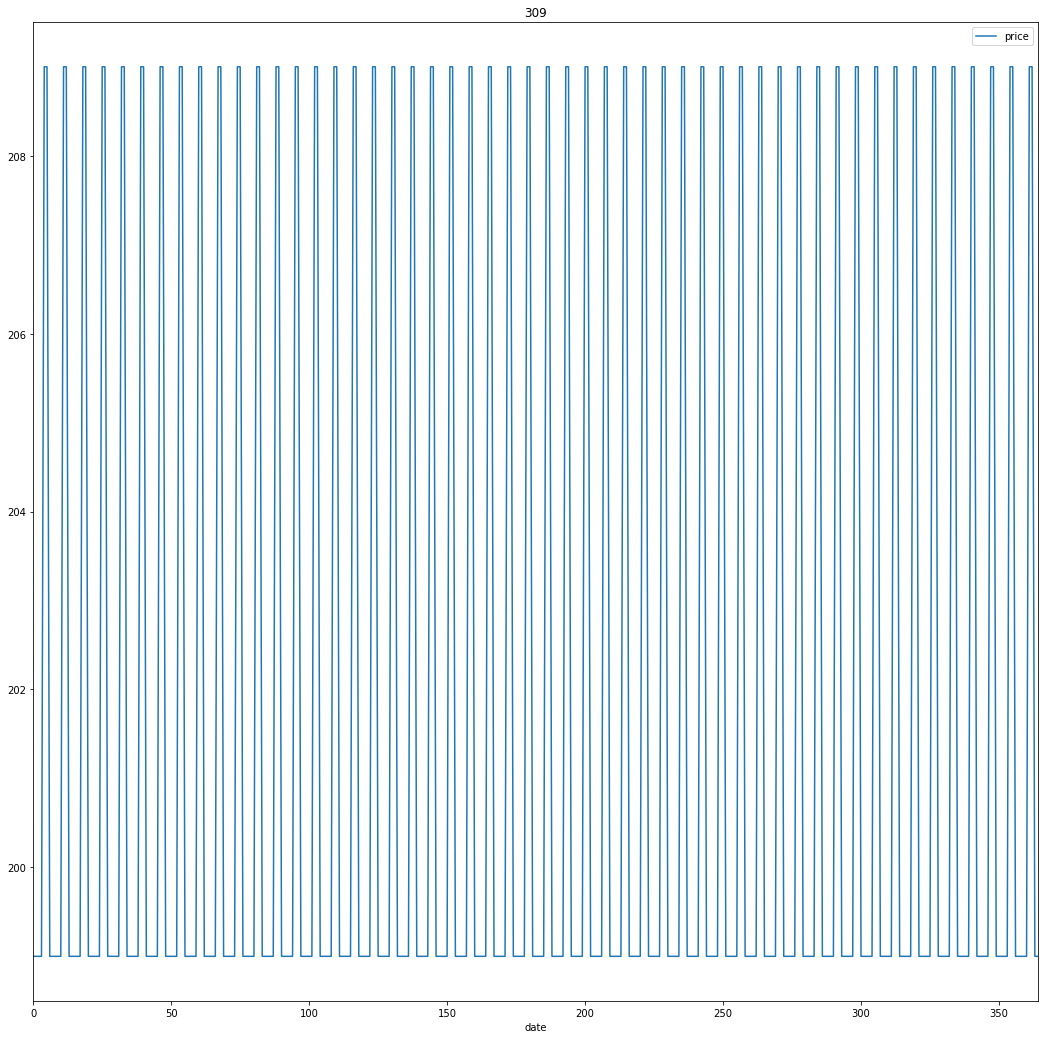

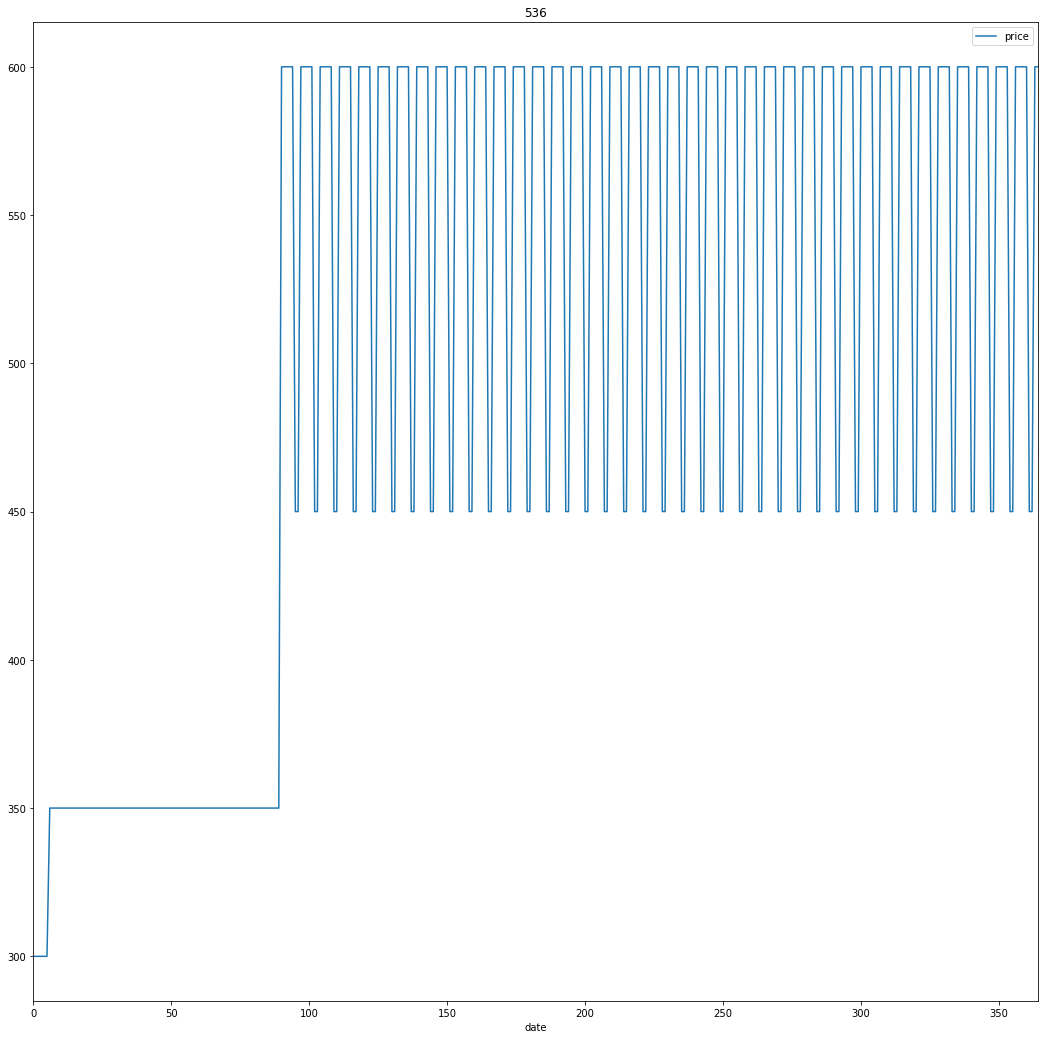

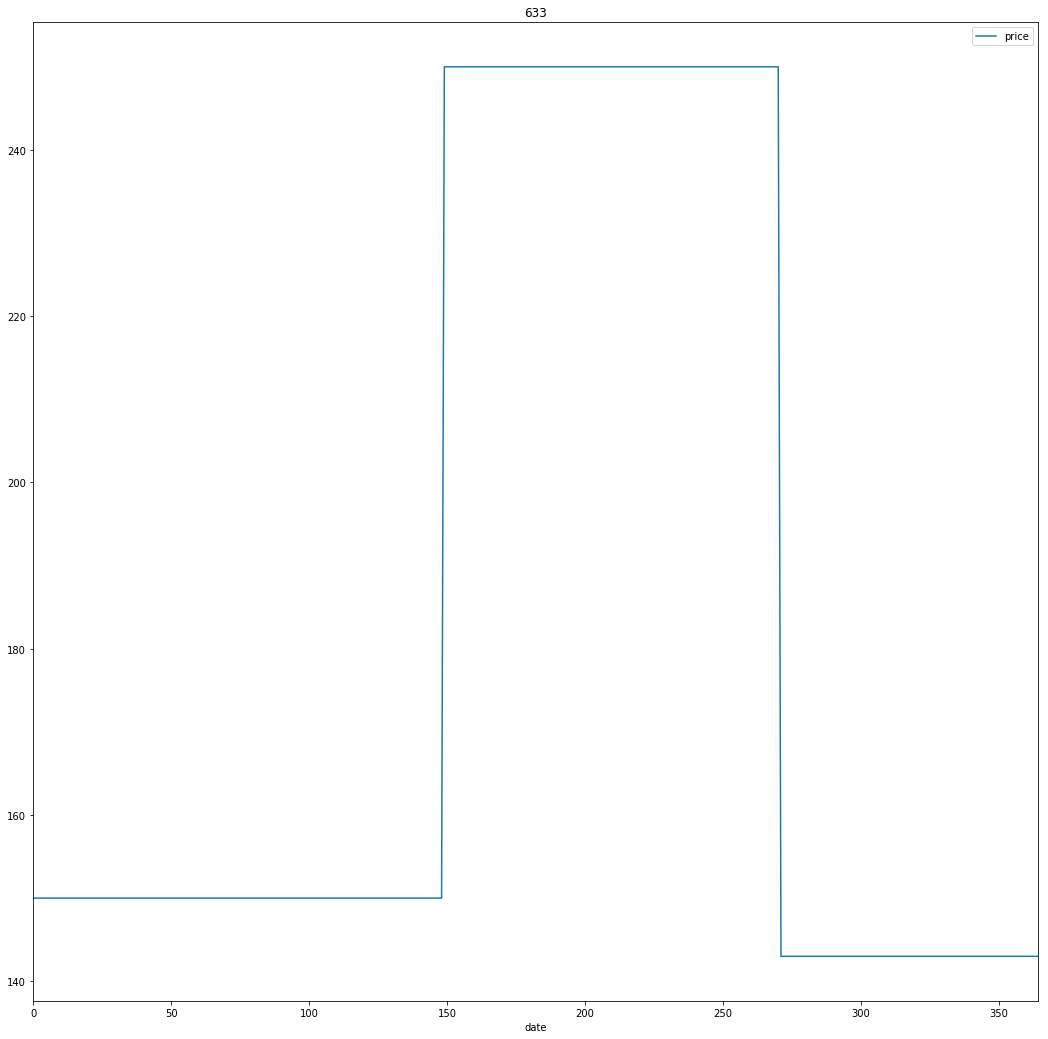

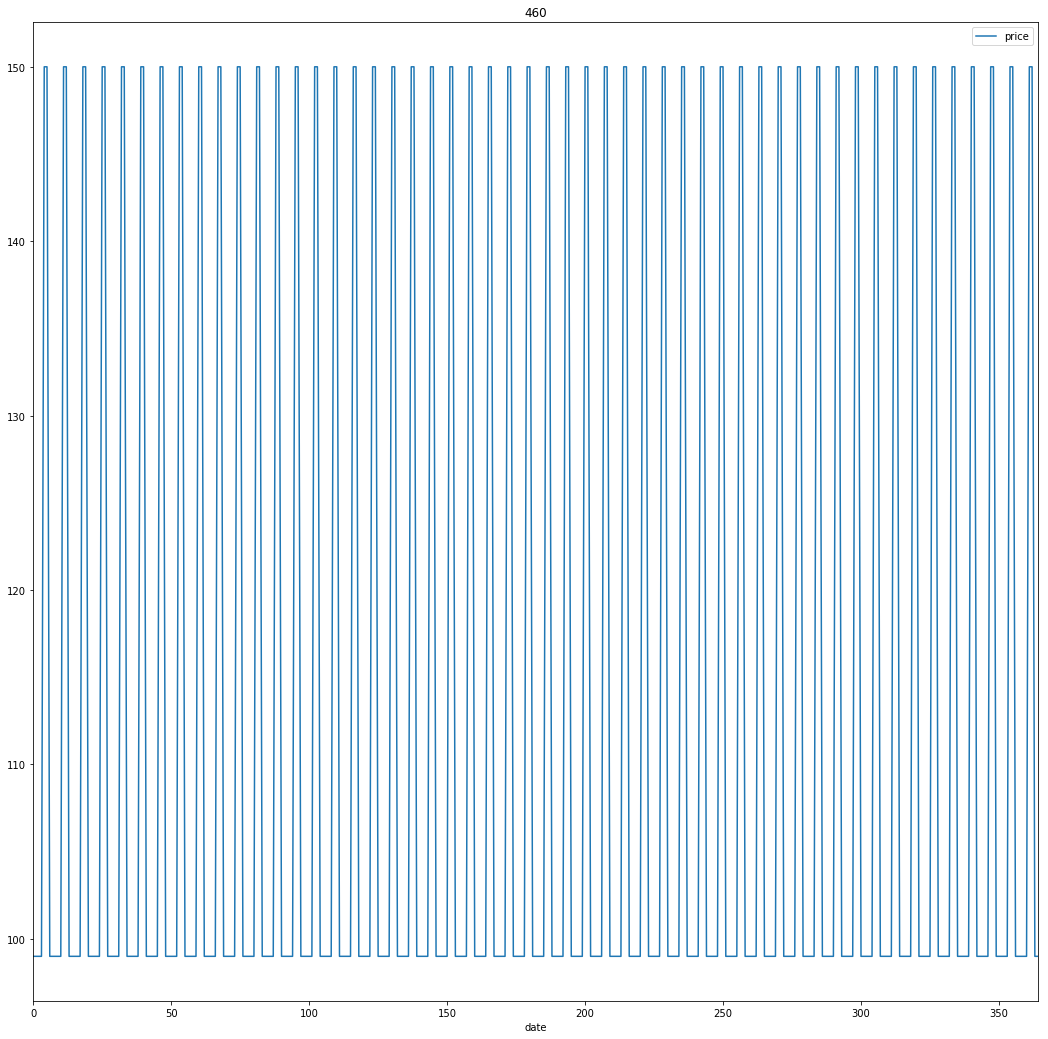

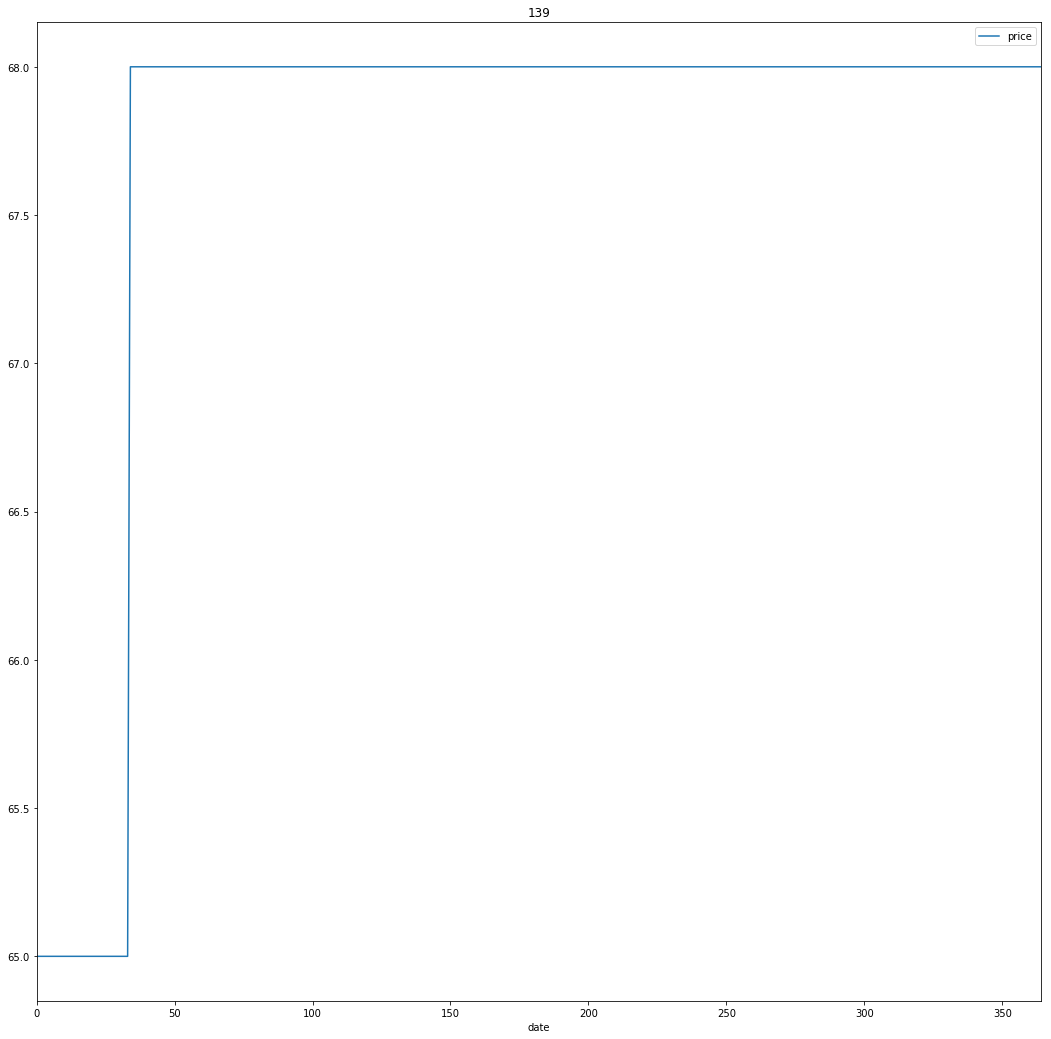

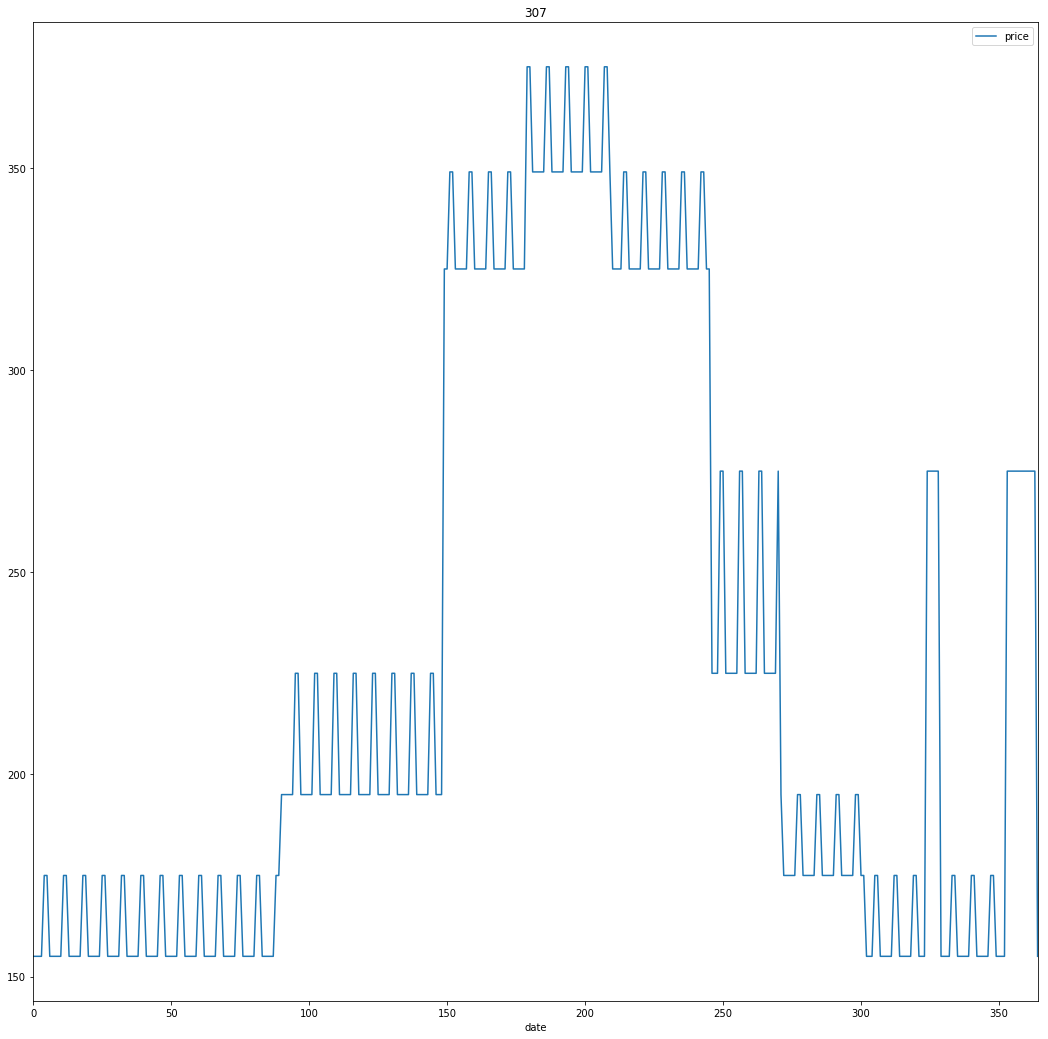

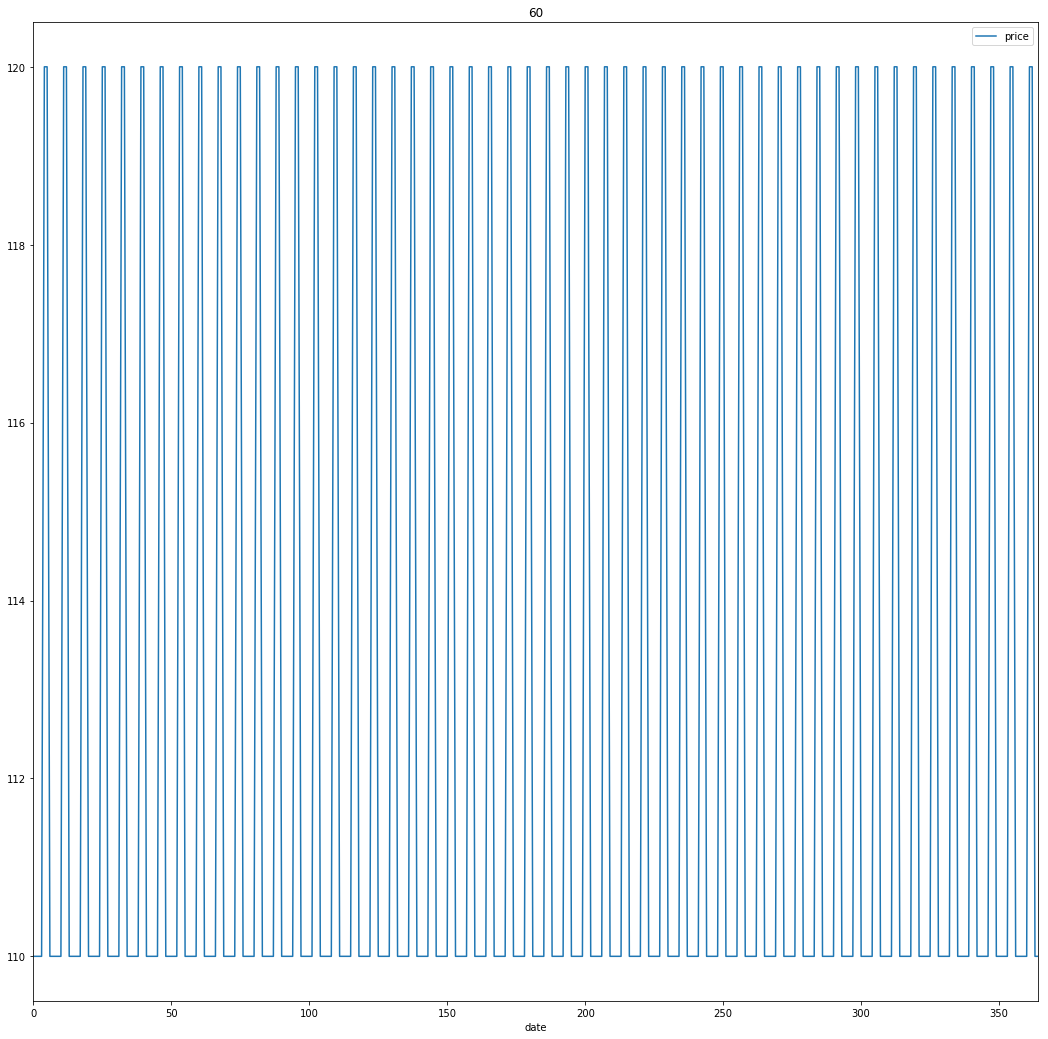

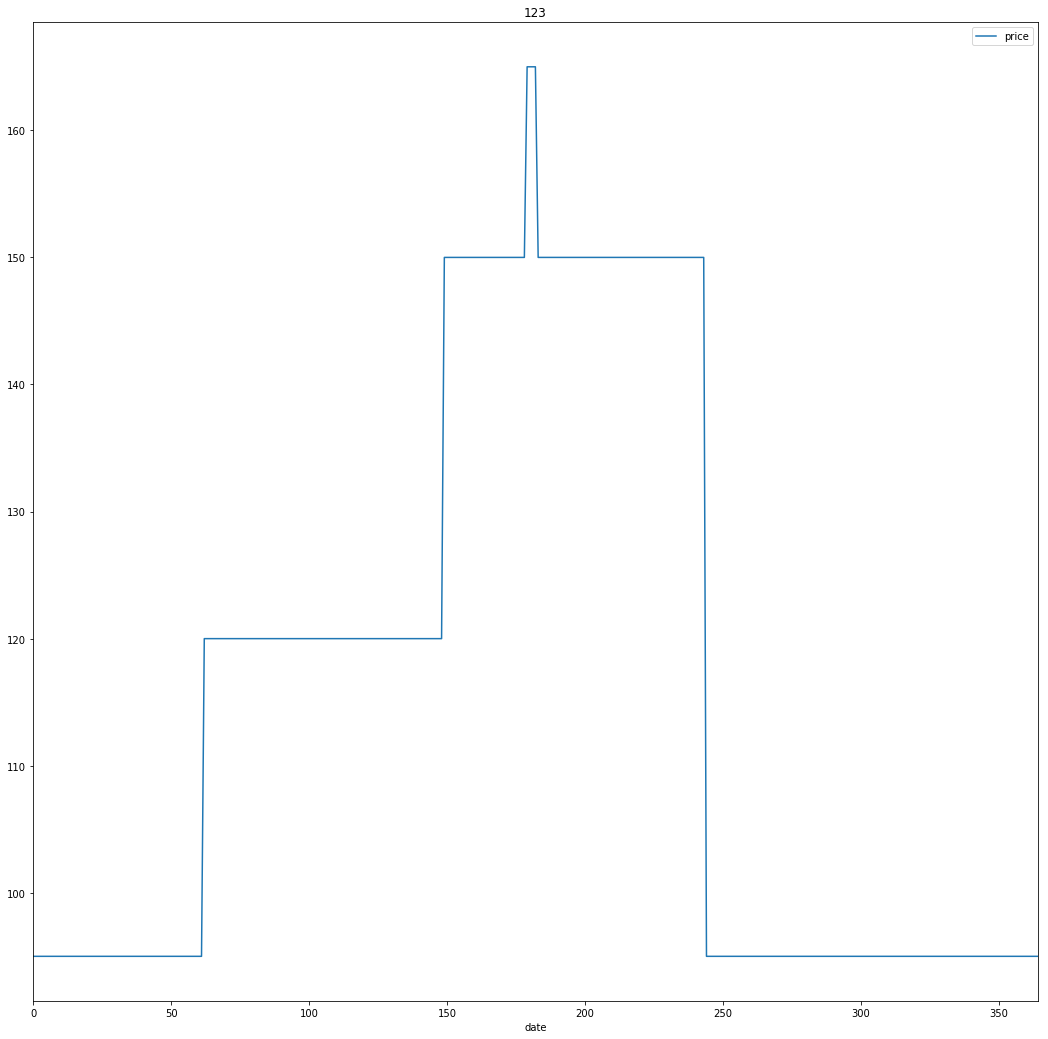

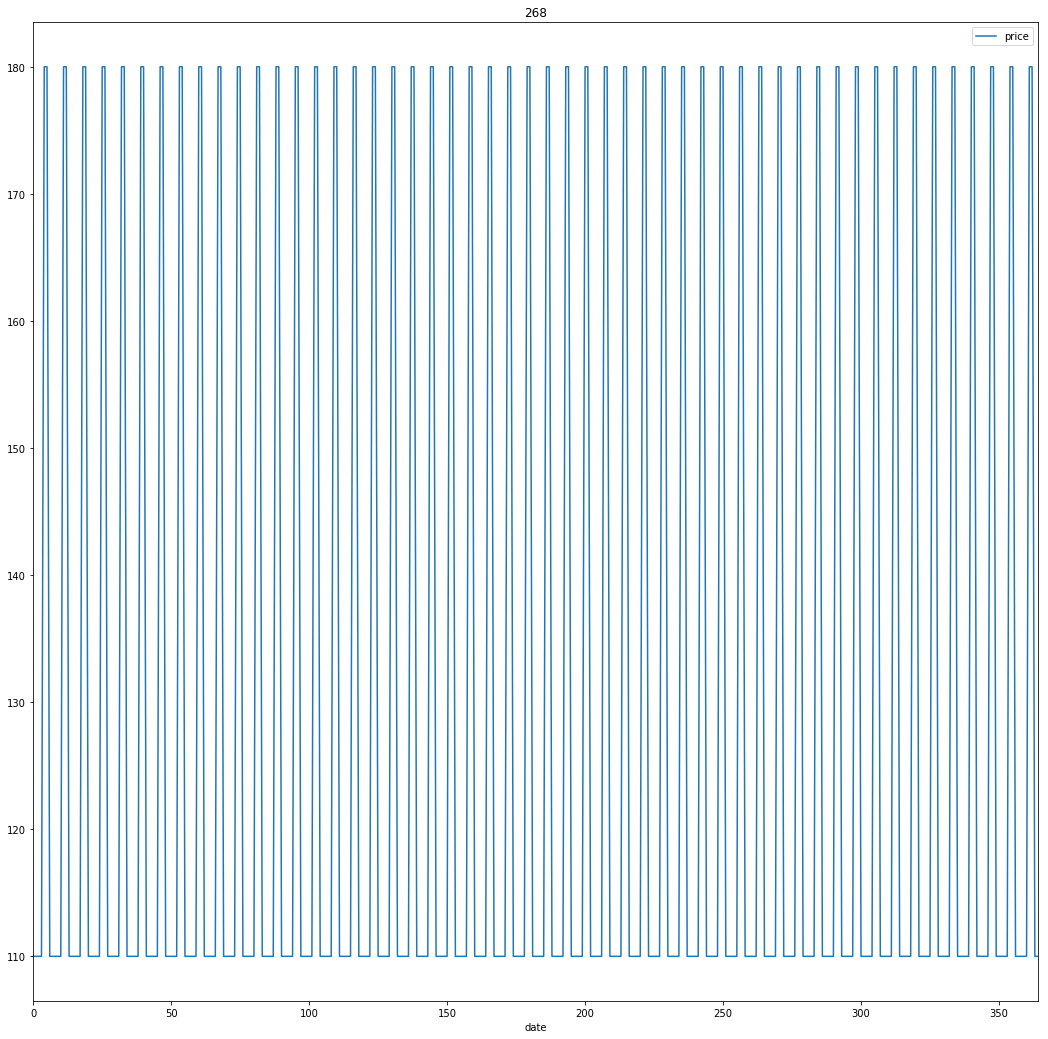

In [14]:
for id_ in np.random.permutation(price_not_same)[:20]:
    print(id_)
    one_listing = seattle_calendar[seattle_calendar.listing_id == complete_id_list[id_]]
    dates_list = list(map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'),one_listing.loc[:,'date']))
    min_date = dt.datetime.strptime(one_listing.date.tolist()[0],'%Y-%m-%d')
    one_listing.loc[:,'date'] = list(map(lambda x: (x - min_date).days, dates_list))
    one_listing.loc[:,'price'] = one_listing.loc[:,'price'].map(lambda x: float(''.join(e for e in x if e.isalnum()))/100) ## from $## to ## 
    one_listing.plot(x='date',y='price',figsize = (6*3,6*3),title=str(id_))

Results: 
I find that many listings have a price for weekend nights i.e. Friday and Saturday and another price for Weekdays. 
Next I will analyze listings that follow a different distributions 

day 0 is Mon 
Therefore day%7 {0,1,2,3,6} = weekday and {4,5} is weekend

In [18]:
weekdays = [d for d in range(365) if d%7 in [0,1,2,3,6]]
weekends = [d for d in range(365) if d%7 not in [0,1,2,3,6]]

In [20]:
price_not_weekends = []
for id_ in price_not_same:
    one_listing = seattle_calendar[seattle_calendar.listing_id == complete_id_list[id_]]
    dates_list = list(map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'),one_listing.loc[:,'date']))
    min_date = dt.datetime.strptime(one_listing.date.tolist()[0],'%Y-%m-%d')
    one_listing.loc[:,'date'] = list(map(lambda x: (x - min_date).days, dates_list))
    one_listing.loc[:,'price'] = one_listing.loc[:,'price'].map(lambda x: float(''.join(e for e in x if e.isalnum()))/100) ## from $## to ## 
    one_listing_weekdaysp = one_listing.iloc[weekdays,:].price.to_numpy()
    one_listing_weekendsp = one_listing.iloc[weekends,:].price.to_numpy()
    if not (np.all(one_listing_weekdaysp == one_listing_weekdaysp[0]) and np.all(one_listing_weekendsp == one_listing_weekendsp[0])):
        price_not_weekends.append(id_)

2
7
12
22
24
26
28
32
33
36
38
39
44
46
50
62
68
71
73
77
78
81
88
91
93
97
98
99
104
105
109
114
116
123
124
128
130
135
136
137
139
142
143
148
149
150
154
155
156
169
174
178
192
198
202
207
210
214
220
229
232
248
249
250
255
258
259
262
264
267
271
272
277
278
280
287
290
294
297
304
307
312
318
326
334
342
351
353
355
366
368
370
374
388
398
399
415
417
418
422
423
424
425
431
432
442
445
447
456
459
463
466
490
491
492
498
504
505
509
510
528
529
532
533
536
547
568
569
573
579
594
601
605
633
647
655
657
659
661
669
670
677


Next we look at 20 random of these.

220


/home/mmahrous/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


432
128
601
459
33
38
116
447
124
249
97
368
579
423
71
366
424
73
271


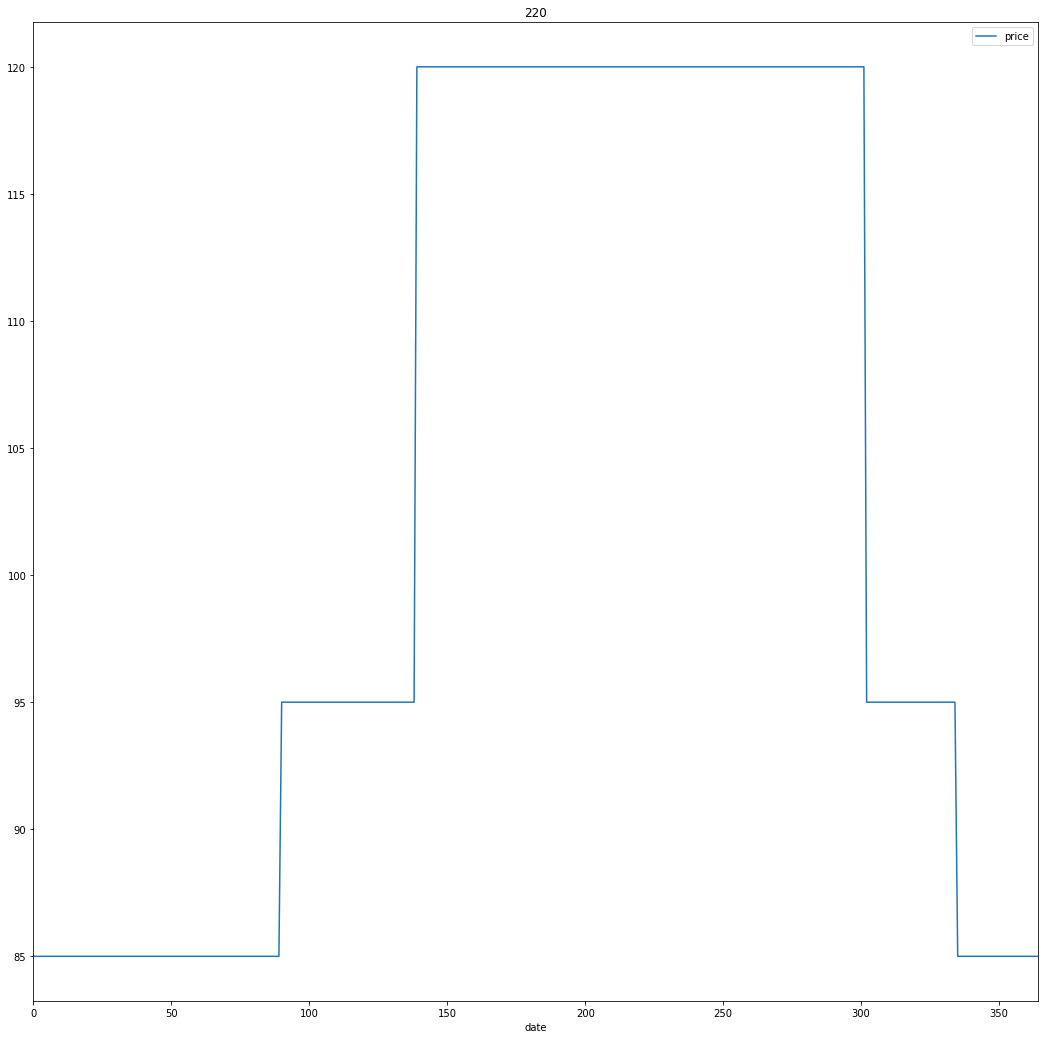

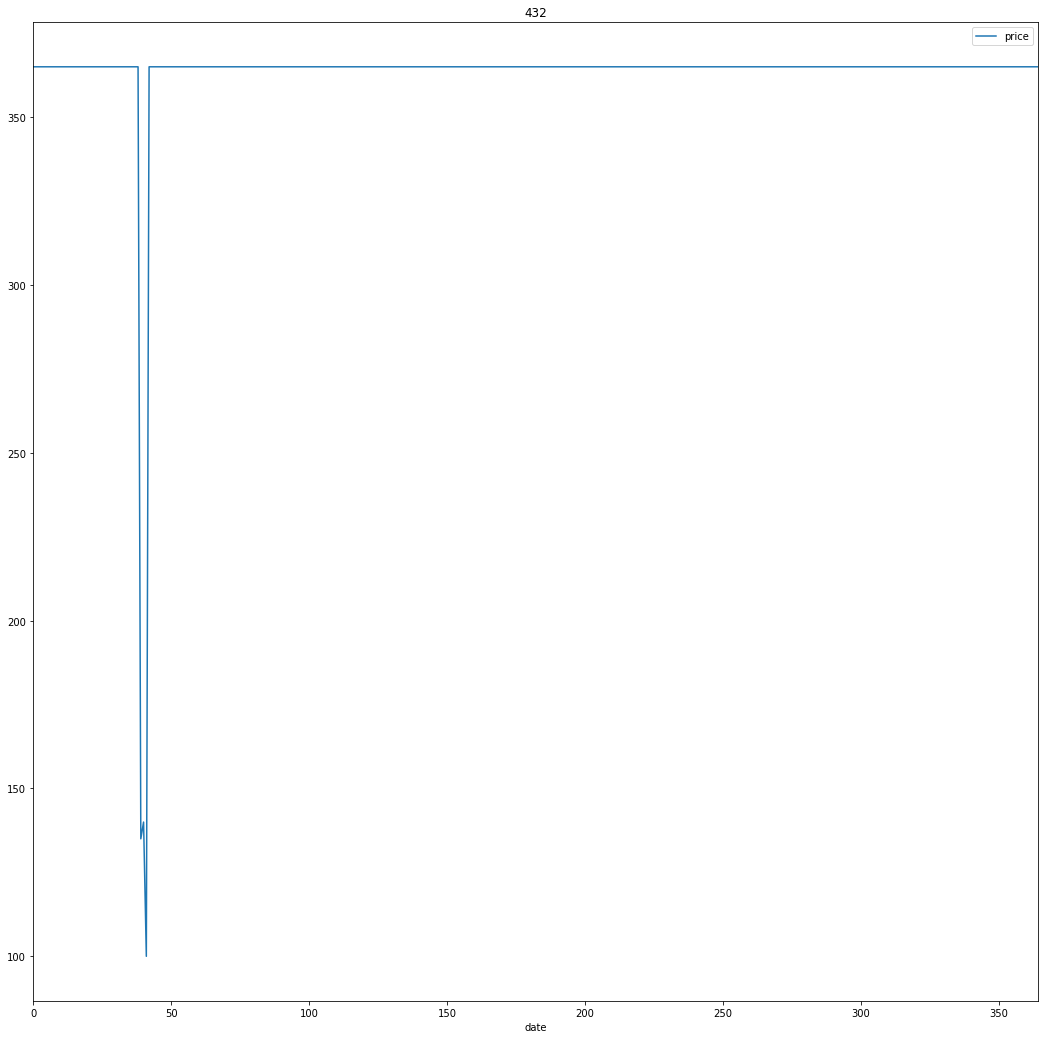

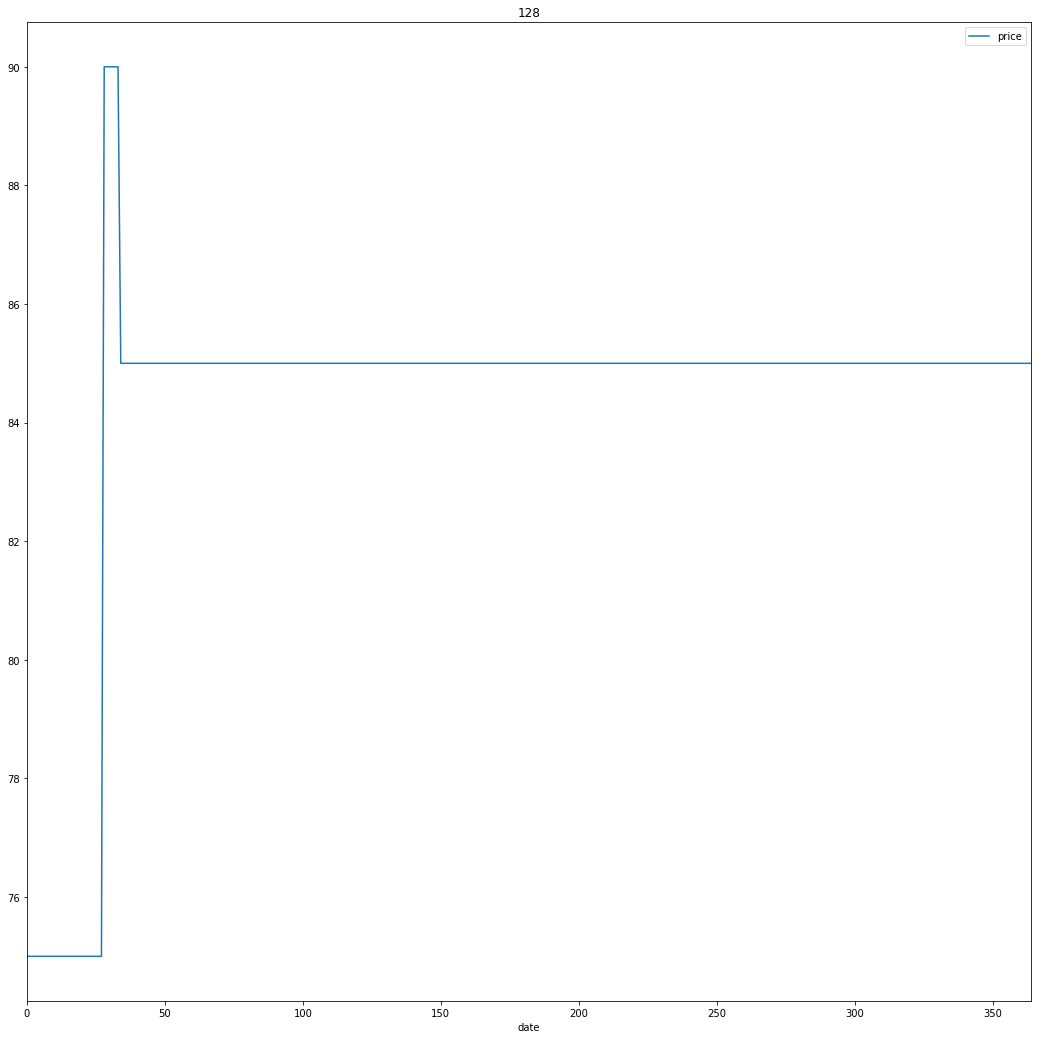

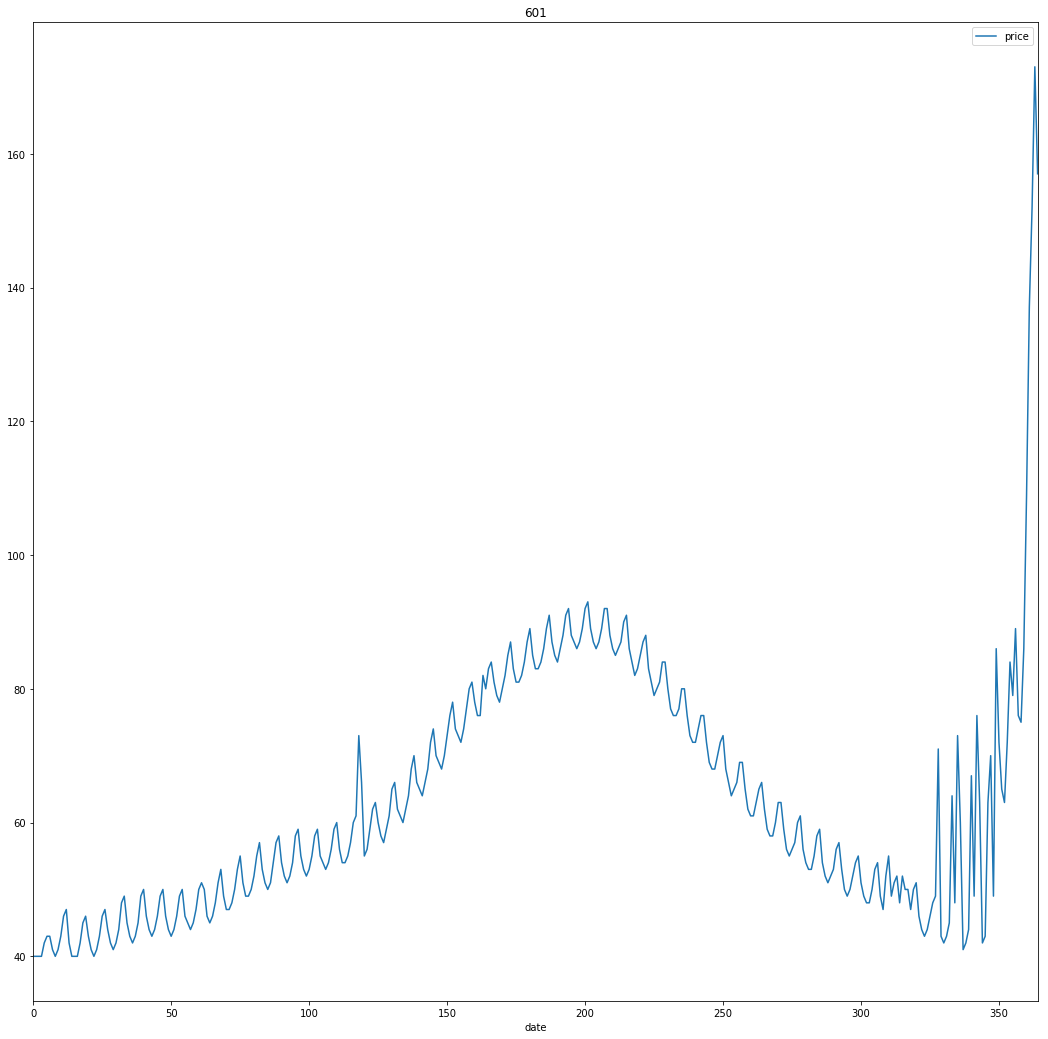

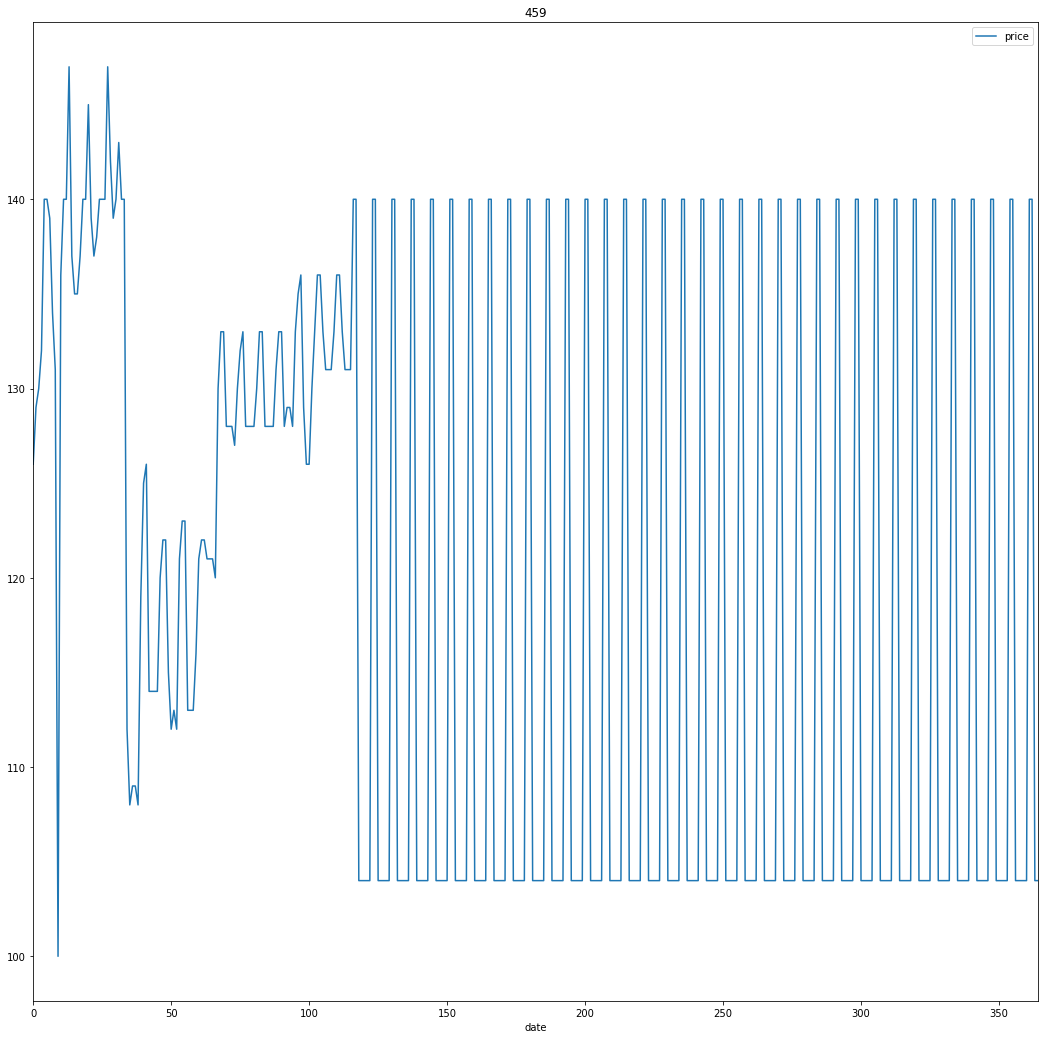

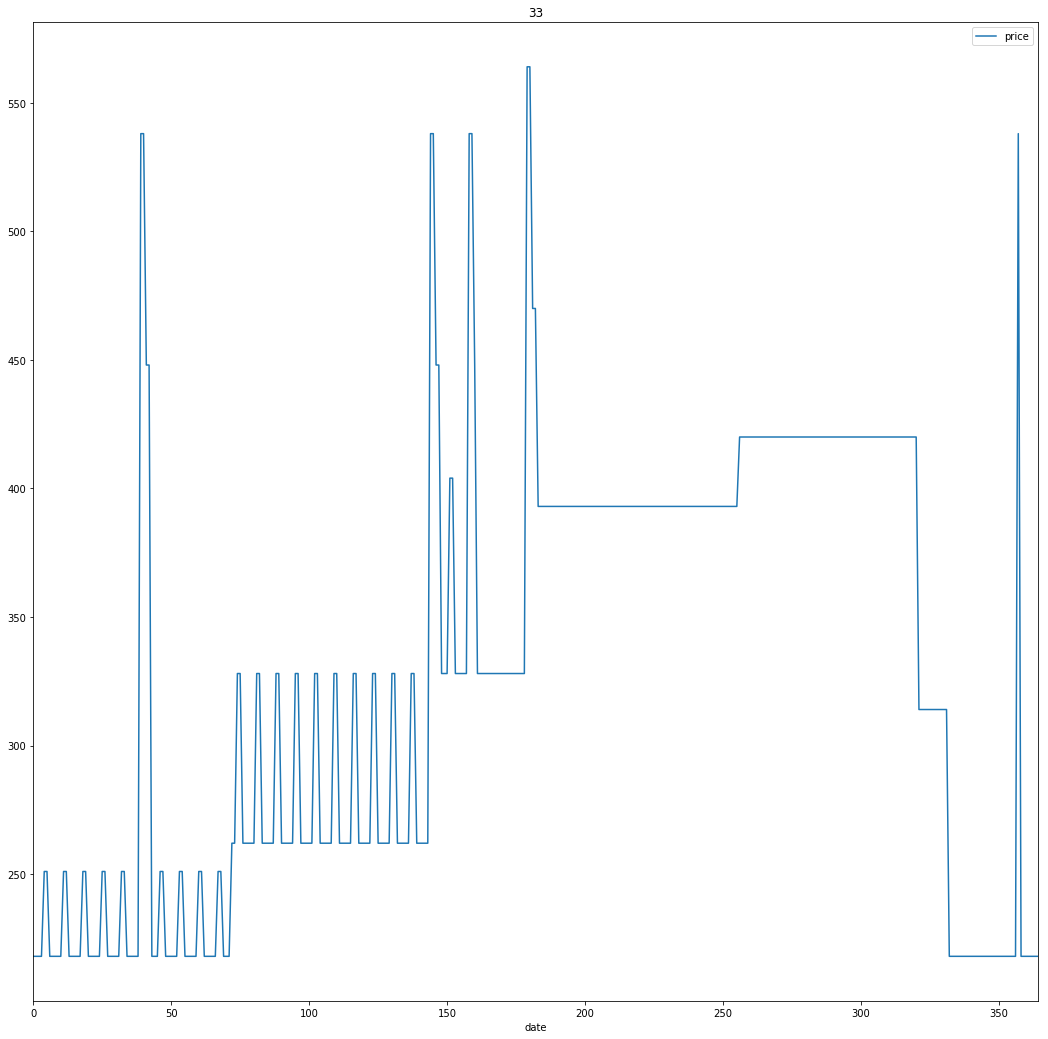

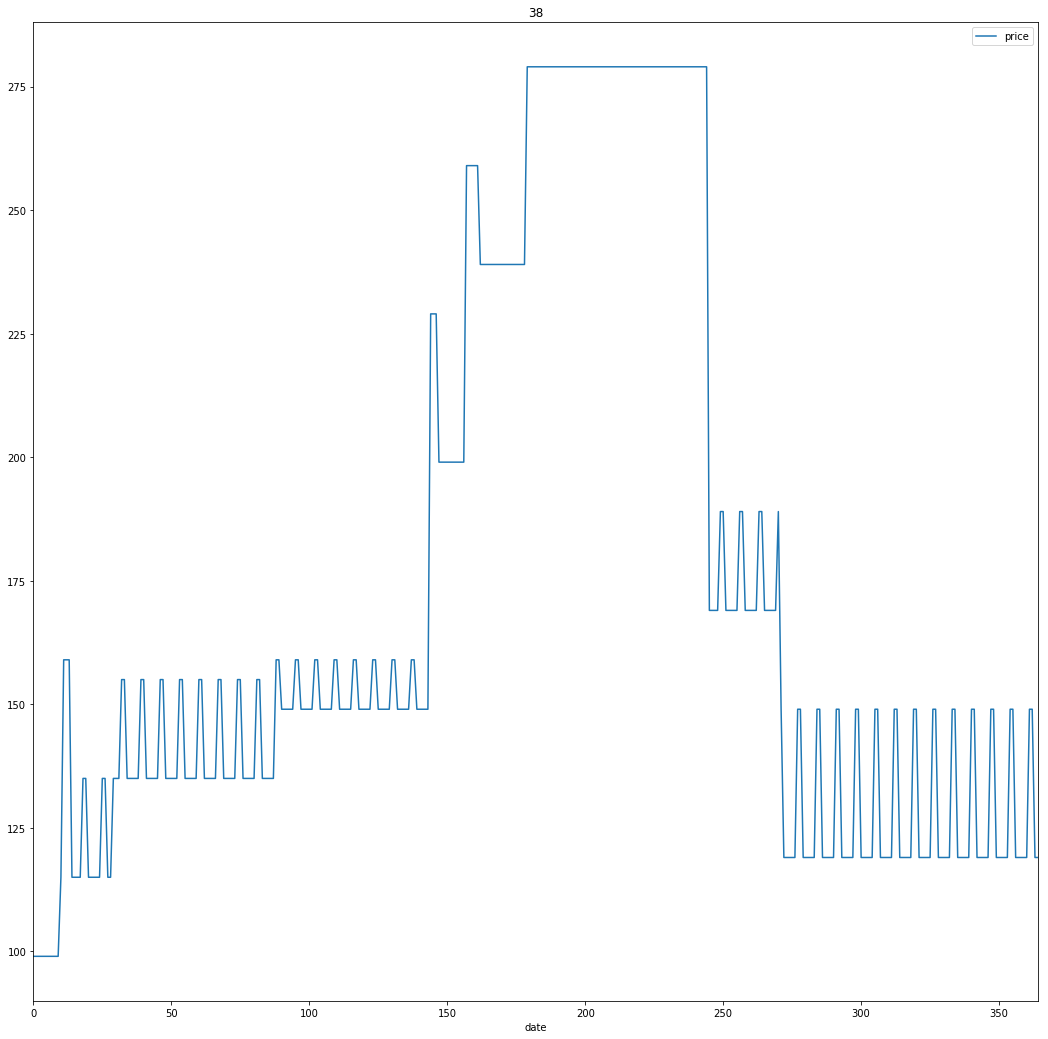

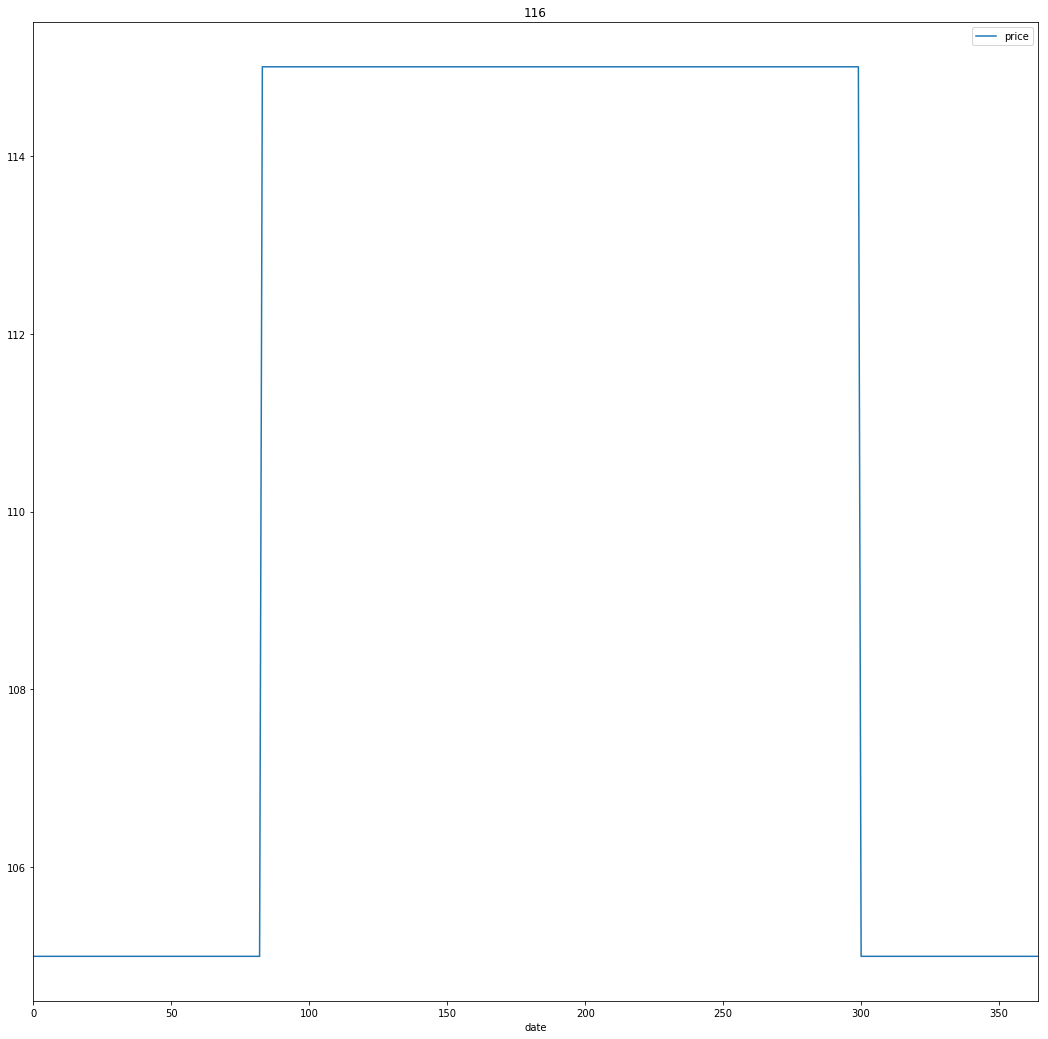

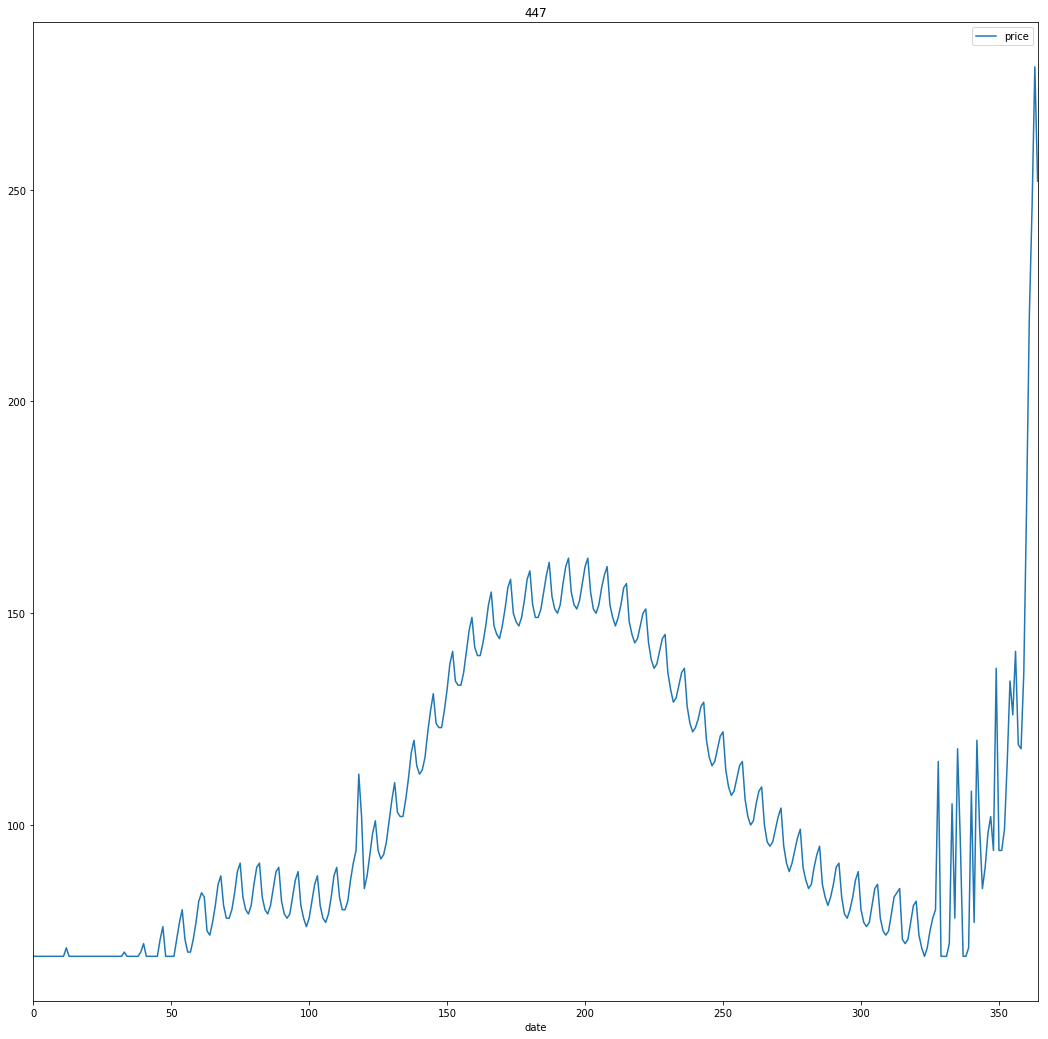

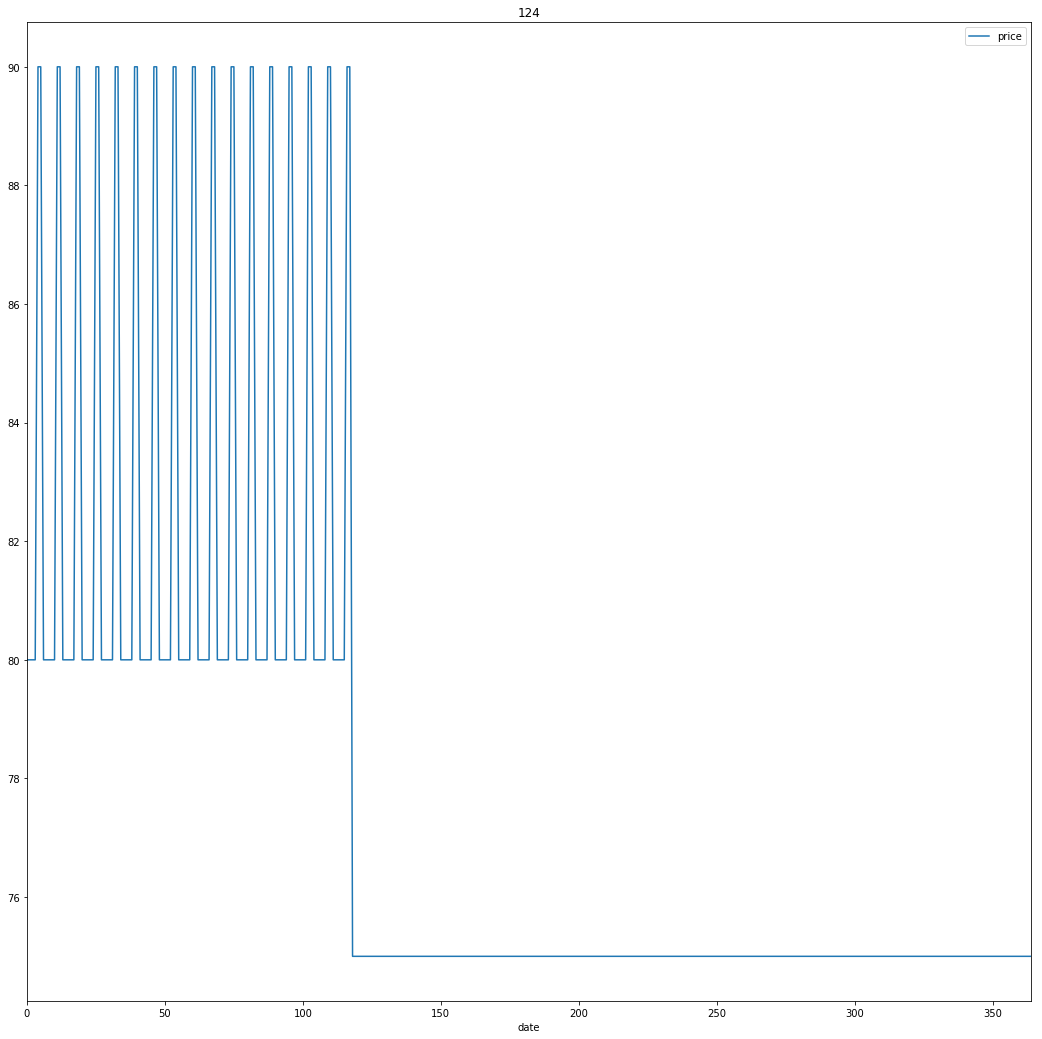

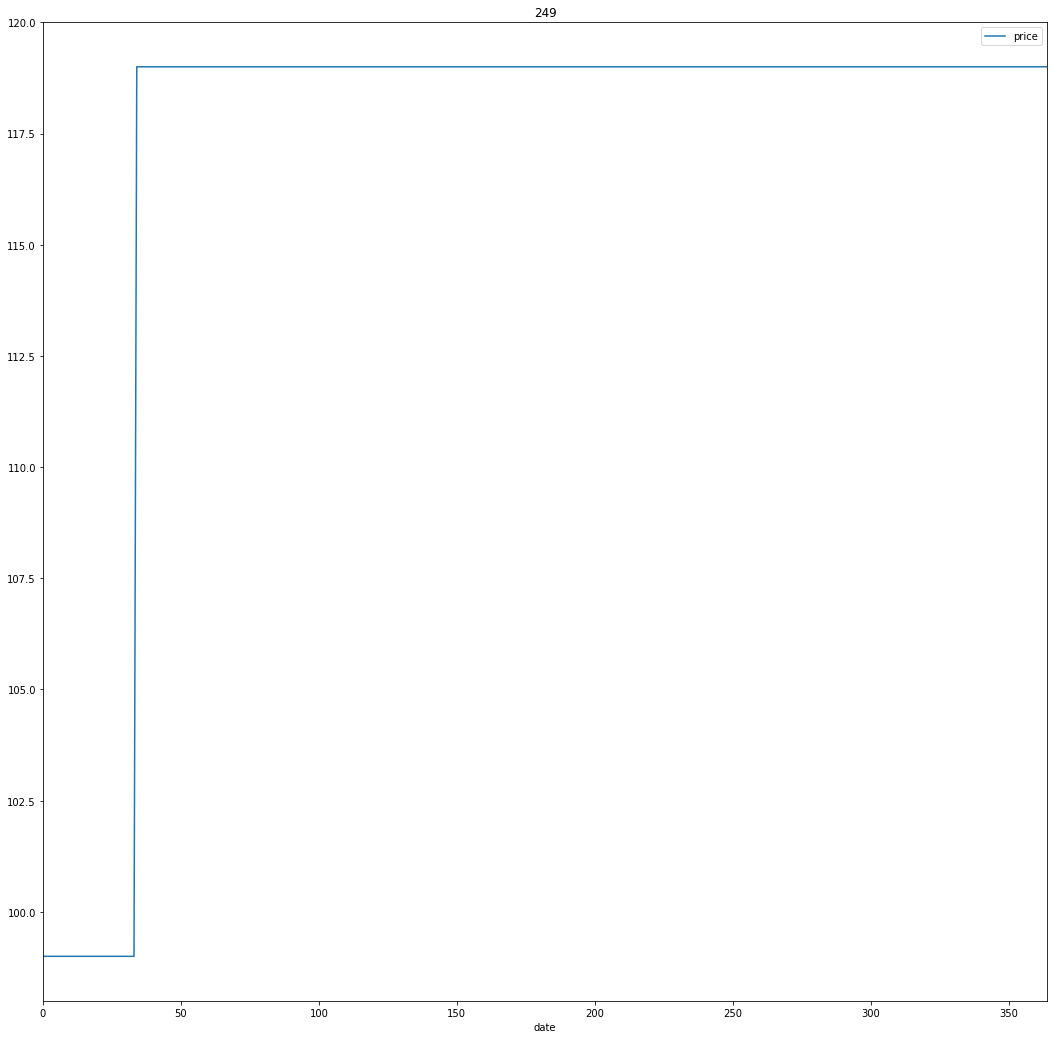

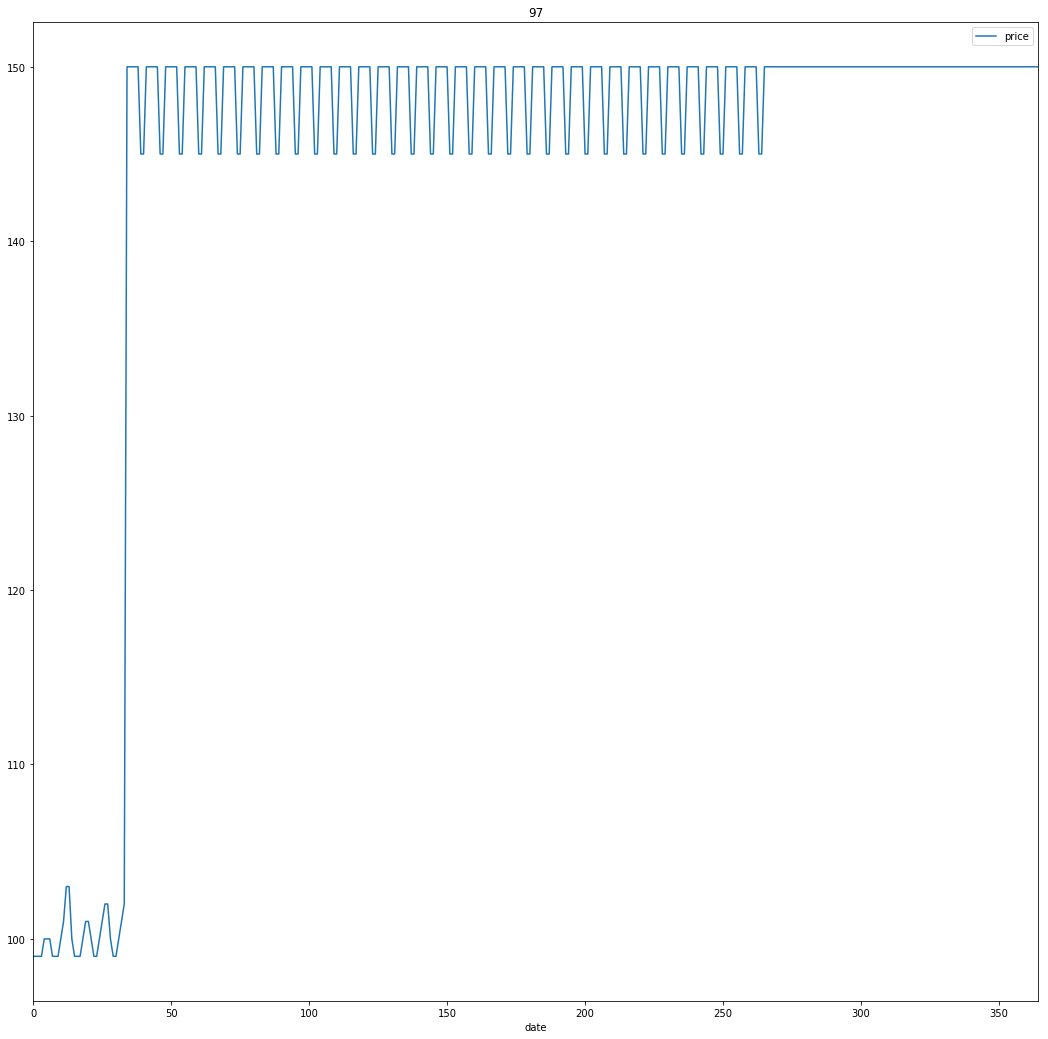

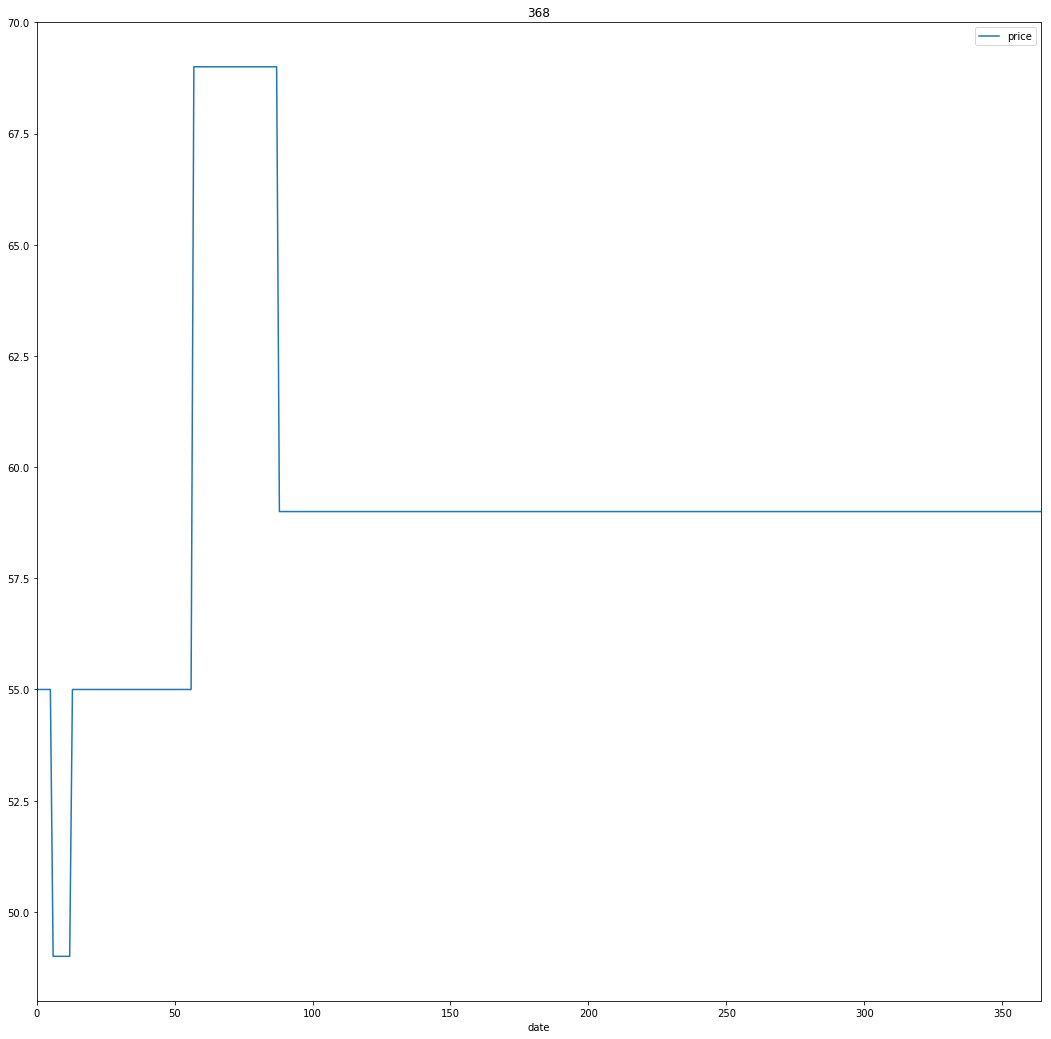

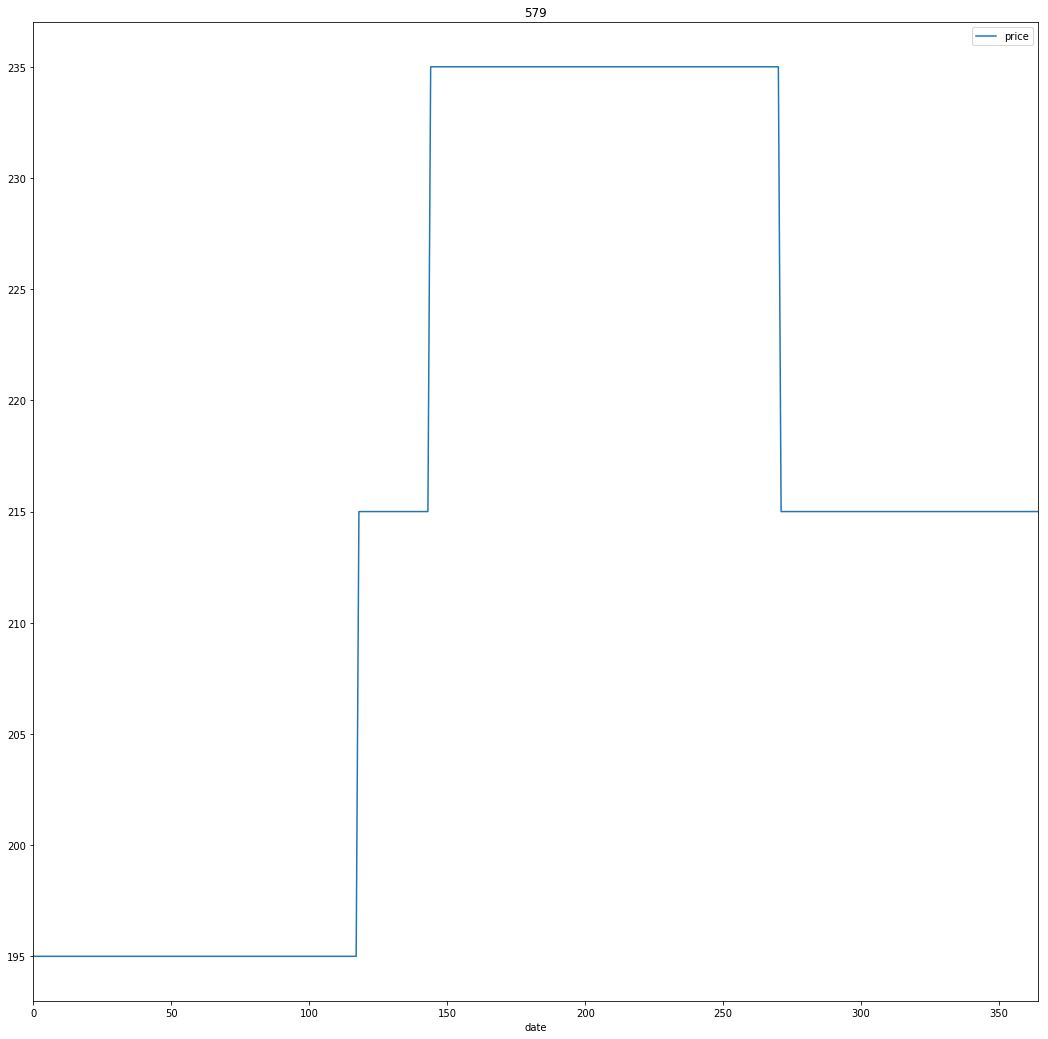

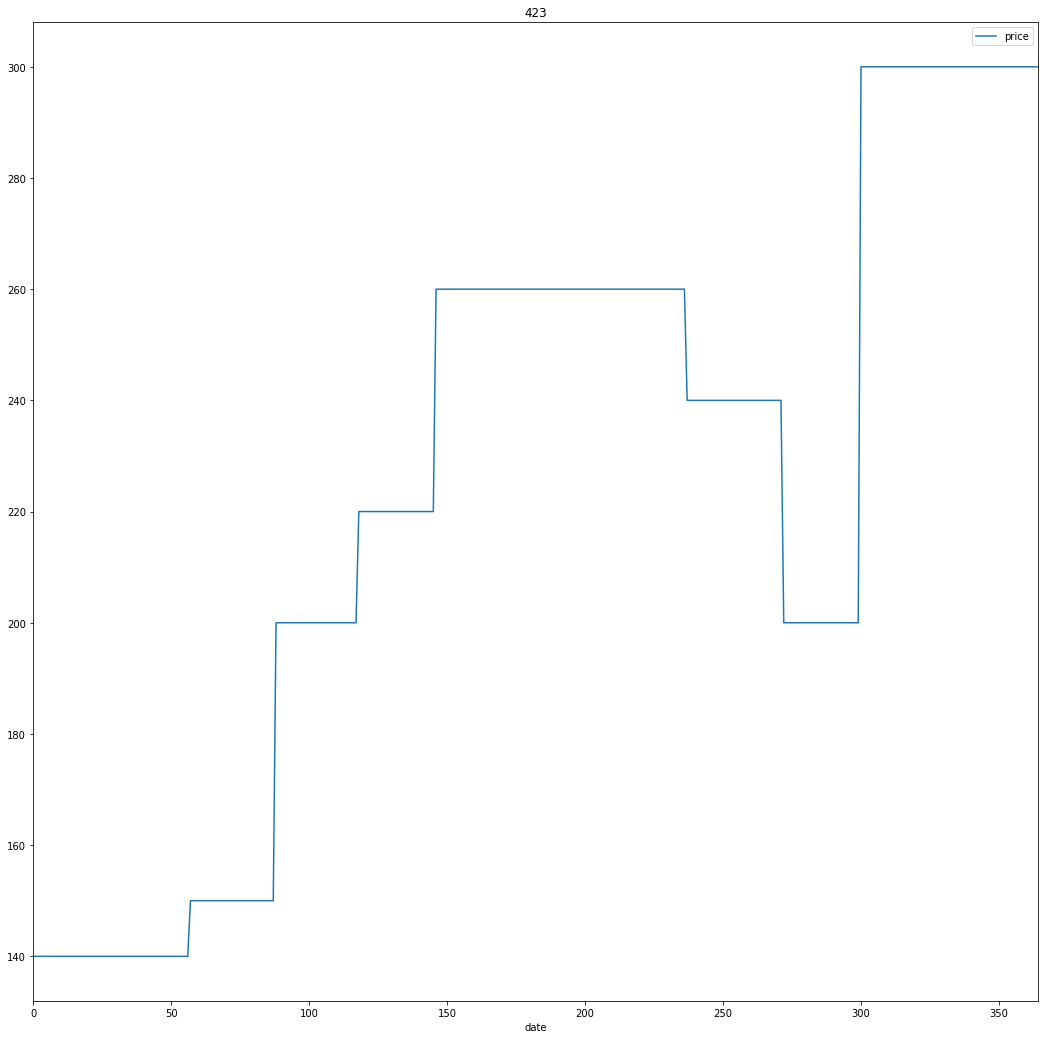

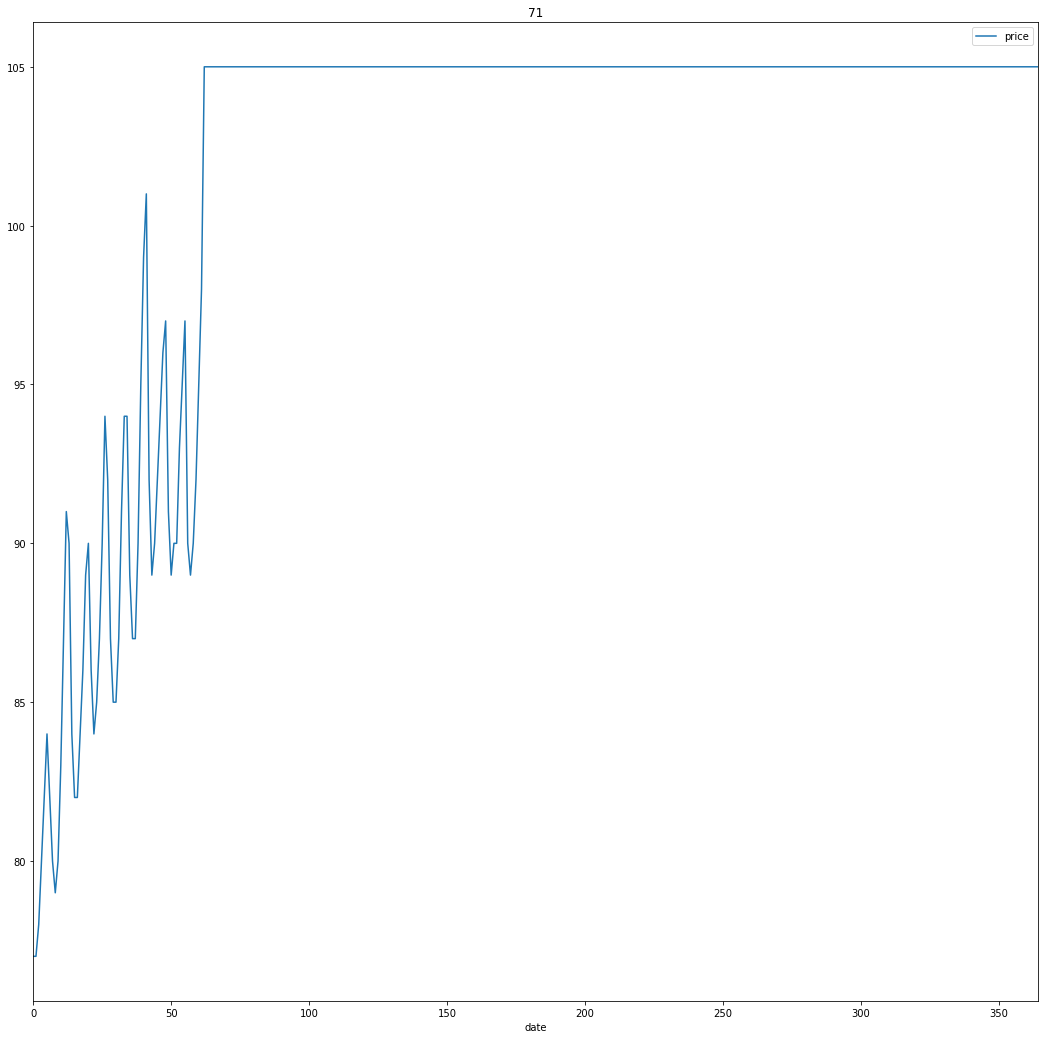

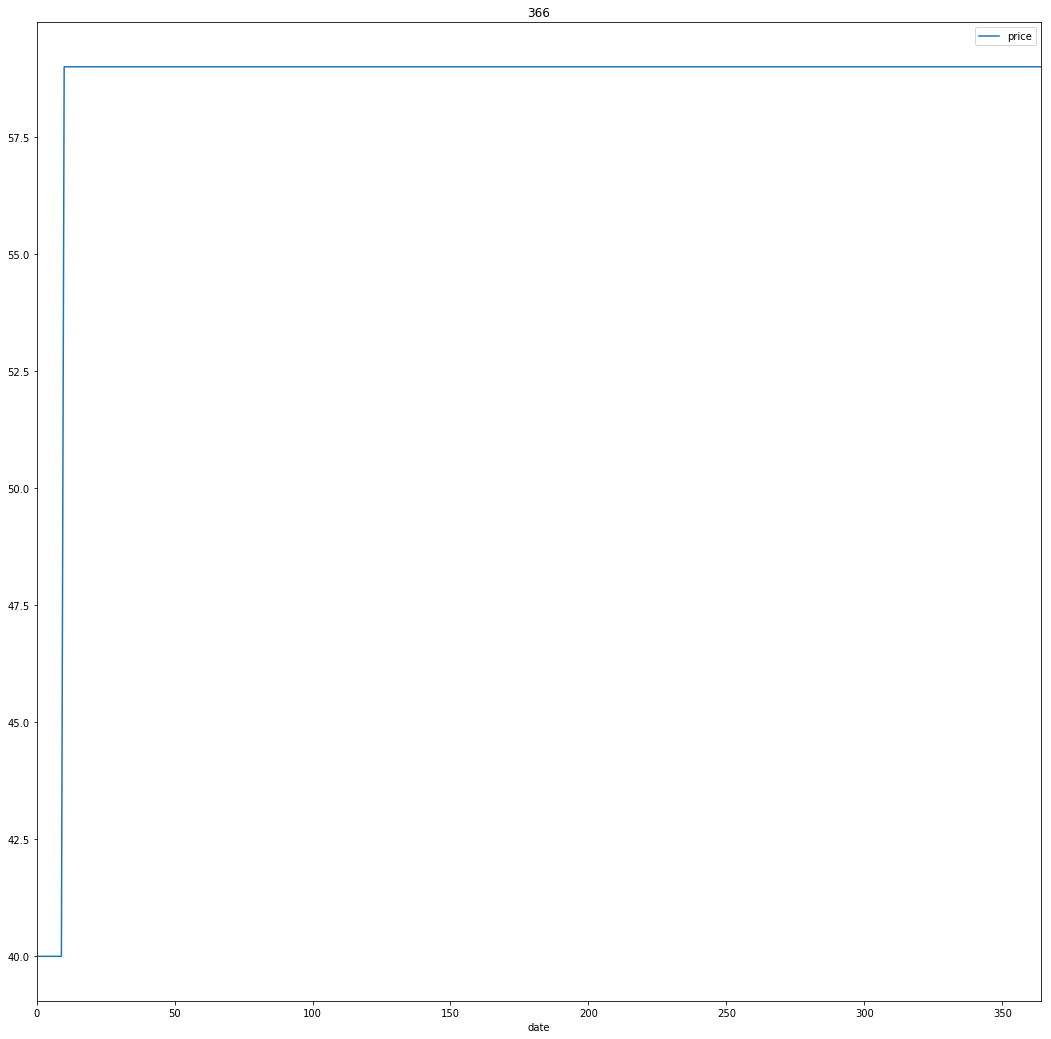

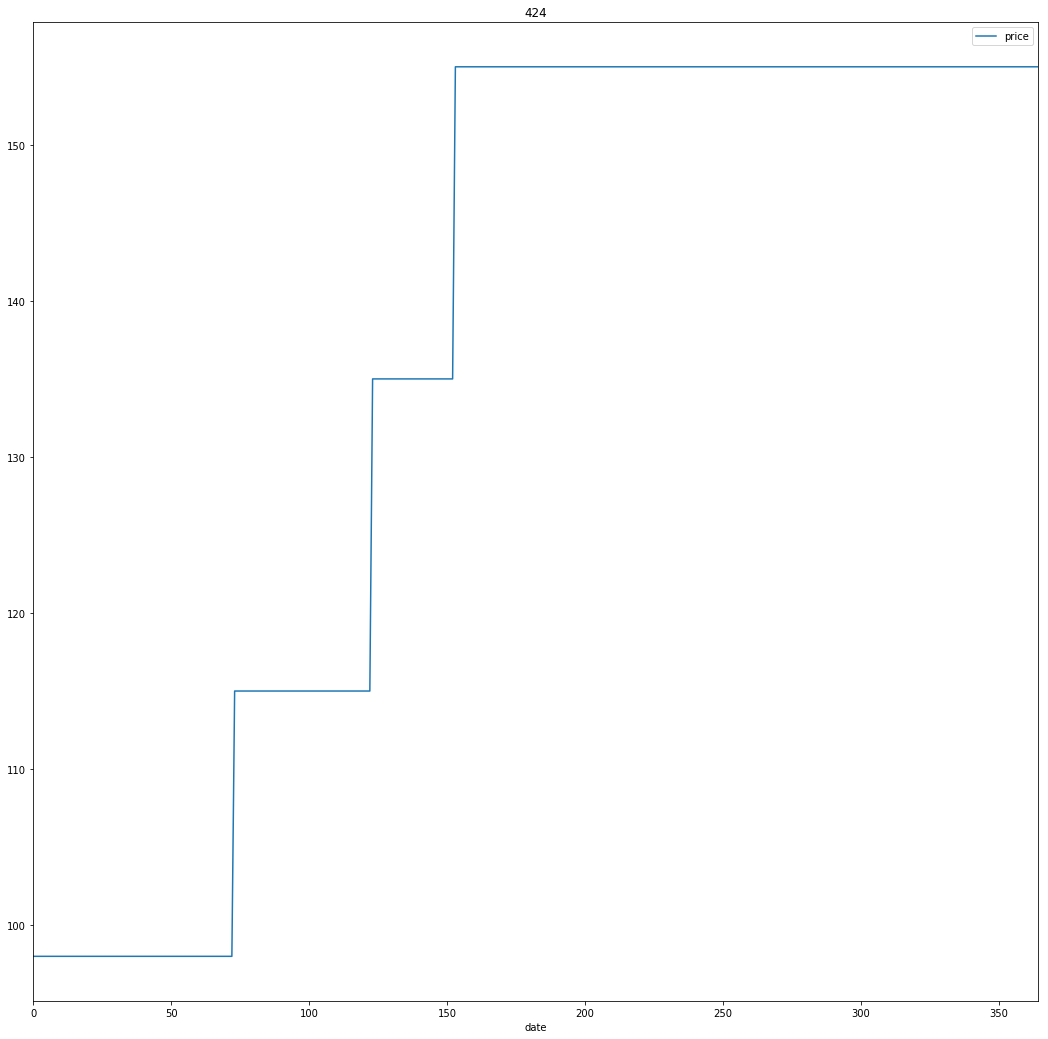

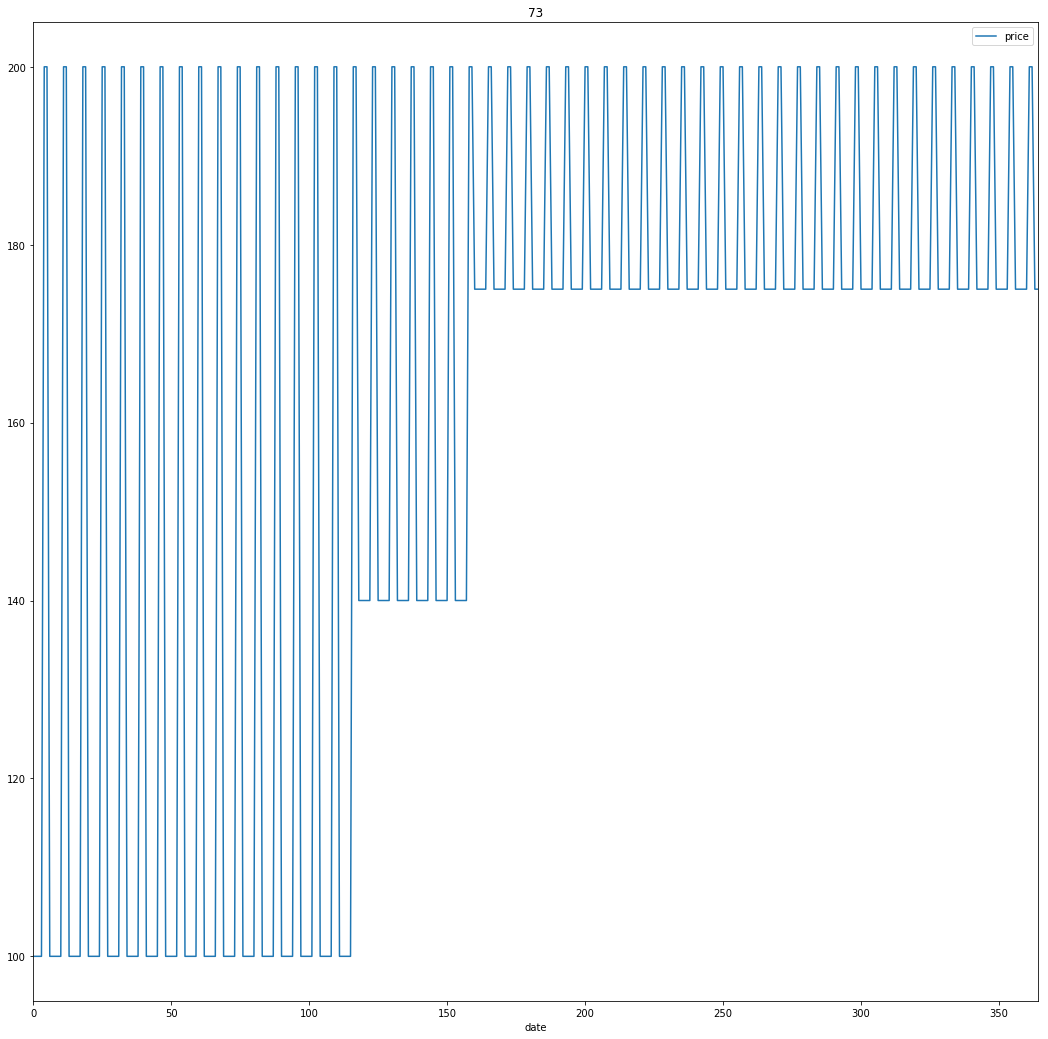

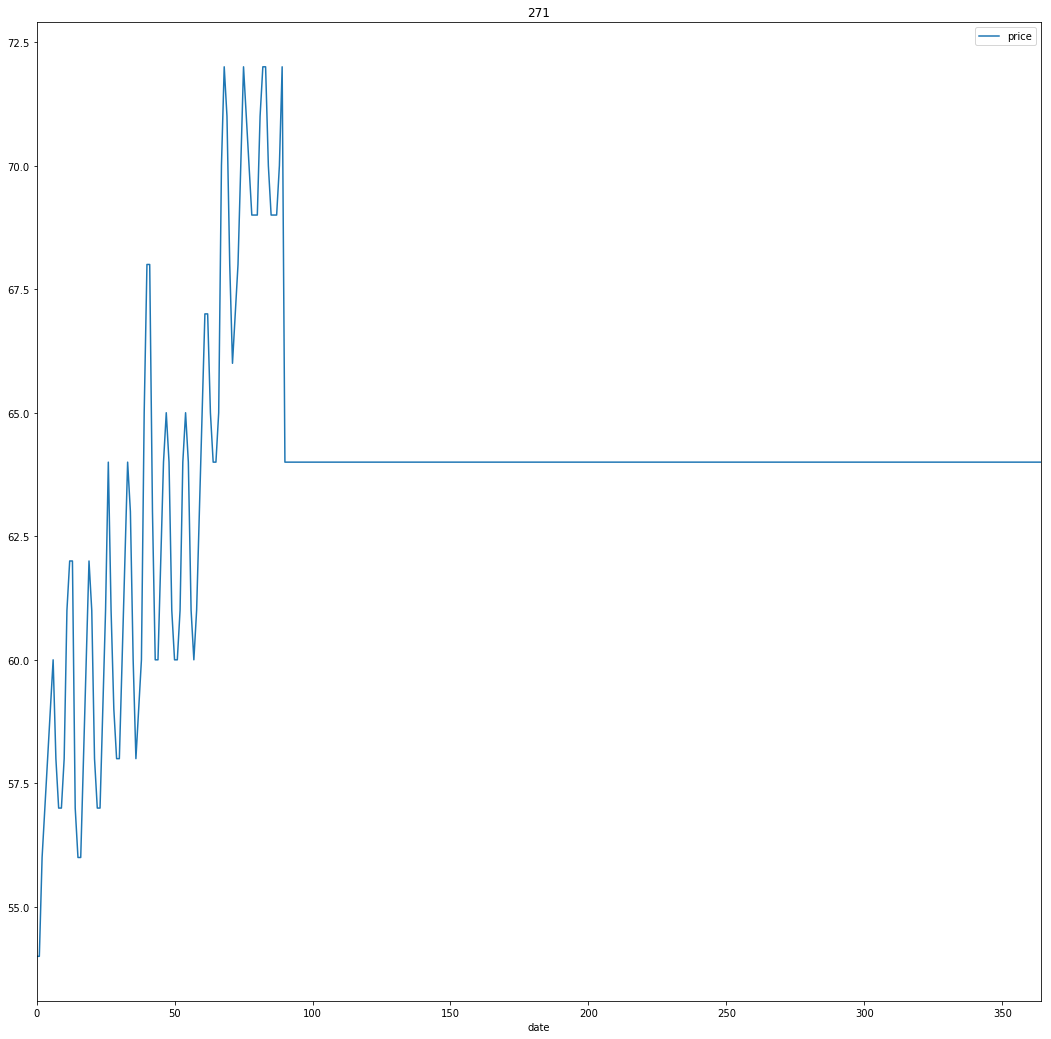

In [65]:
for id_ in np.random.permutation(price_not_weekends)[:20]:
    one_listing = seattle_calendar[seattle_calendar.listing_id == complete_id_list[id_]]
    dates_list = list(map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'),one_listing.loc[:,'date']))
    min_date = dt.datetime.strptime(one_listing.date.tolist()[0],'%Y-%m-%d')
    one_listing.loc[:,'date'] = list(map(lambda x: (x - min_date).days, dates_list))
    one_listing.loc[:,'price'] = one_listing.loc[:,'price'].map(lambda x: float(''.join(e for e in x if e.isalnum()))/100) ## from $## to ## 
    one_listing.plot(x='date',y='price',figsize = (6*3,6*3),title=str(id_))

We find some trends of increase in price in the middle of year. let's see how to analyze this

Now we need to find a way to combine these graphs. 
First thing that comes to mind is to standardize all the arrays and add them and standardize the output and then plot the results.

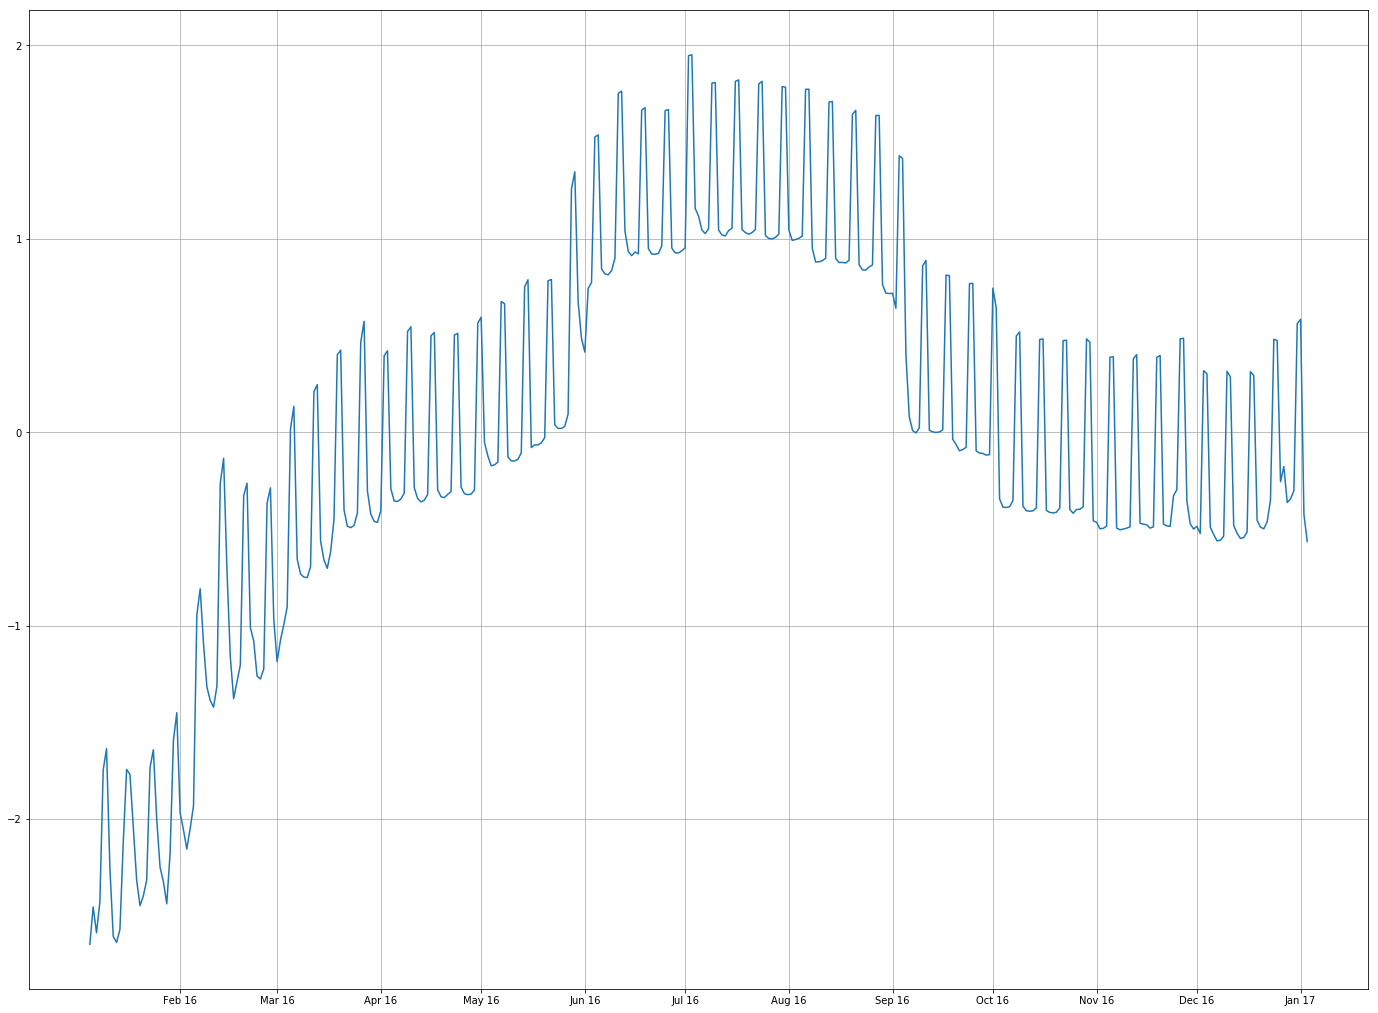

In [66]:
pd.options.mode.chained_assignment = None
combined_array = np.asarray([0]*365).reshape((-1,1))
for id_ in price_not_weekends:
    one_listing = seattle_calendar[seattle_calendar.listing_id == complete_id_list[id_]]
    dates_list = list(map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'),one_listing.loc[:,'date']))
    min_date = dt.datetime.strptime(one_listing.date.tolist()[0],'%Y-%m-%d')
    one_listing.loc[:,'date'] = list(map(lambda x: (x - min_date).days, dates_list))
    one_listing.loc[:,'price'] = one_listing.loc[:,'price'].map(lambda x: float(''.join(e for e in x if e.isalnum()))/100) ## from $## to ## 
    scl = StandardScaler()
    combined_array = combined_array + scl.fit_transform(one_listing.price.to_numpy().reshape((-1,1))) 
scl = StandardScaler()
combined_array =scl.fit_transform(combined_array).squeeze()
fig,ax = plt.subplots(figsize = (4*4,4*3))
ax.grid(True)
ax.set_xticks(first_day_each_month)
ax.set_xticklabels(labels = ['Jan 17','Feb 16','Mar 16','Apr 16','May 16','Jun 16','Jul 16','Aug 16','Sep 16','Oct 16','Nov 16','Dec 16'])
sns.lineplot(x=list(range(1,365+1)),y=combined_array,ax=ax);
pd.options.mode.chained_assignment = 'warn'

Perfect, we still have the weekend/weekdays fluctuations. 
What is more interesting is that there tends to be an increase throughout the year which is more evident in the summer months between June and September that prices decrease back to fluctuate around the mean

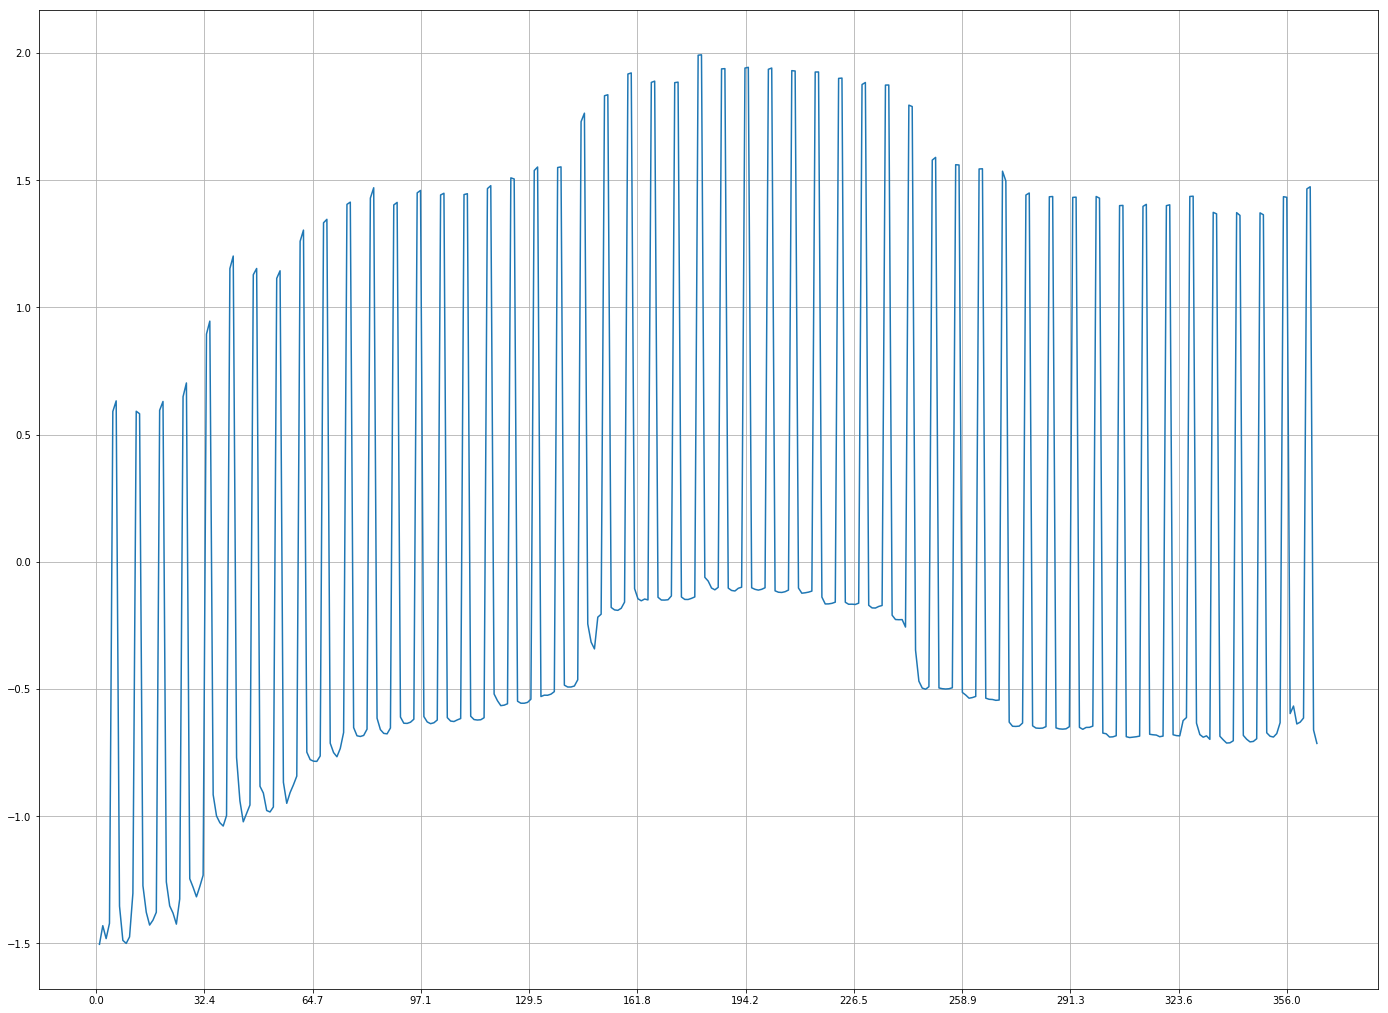

In [23]:
pd.options.mode.chained_assignment = None
combined_array = np.asarray([0]*365).reshape((-1,1))
for id_ in complete_id_list:
    one_listing = seattle_calendar[seattle_calendar.listing_id == id_]
    dates_list = list(map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'),one_listing.loc[:,'date']))
    min_date = dt.datetime.strptime(one_listing.date.tolist()[0],'%Y-%m-%d')
    one_listing.loc[:,'date'] = list(map(lambda x: (x - min_date).days, dates_list))
    one_listing.loc[:,'price'] = one_listing.loc[:,'price'].map(lambda x: float(''.join(e for e in x if e.isalnum()))/100) ## from $## to ## 
    scl = StandardScaler()
    combined_array = combined_array + scl.fit_transform(one_listing.price.to_numpy().reshape((-1,1))) 
scl = StandardScaler()
combined_array =scl.fit_transform(combined_array).squeeze()
fig,ax = plt.subplots(figsize = (4*4,4*3))
ax.grid(True)
ax.set_xticks(first_day_each_month)
ax.set_xticklabels(labels = ['Jan 17','Feb 16','Mar 16','Apr 16','May 16','Jun 16','Jul 16','Aug 16','Sep 16','Oct 16','Nov 16','Dec 16'])
sns.lineplot(x=list(range(1,365+1)),y=combined_array,ax=ax);
pd.options.mode.chained_assignment = 'warn'

Here we see a similar trend but the weekend/day trend is taking over the graph

Now let's look at the other values, we will check values with at least values available for half the year roughly.

In [67]:
listing_ids = num_days[num_days.available > 356//2].index # Check values with at least values available for half the year roughly

In [68]:
listing_ids.shape

(2514,)

We transform the date and the price of the whole dataset to aid us with treating the NaN values later. 

In [70]:
dates_list = list(map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'),seattle_calendar.loc[:,'date']))
min_date = dt.datetime.strptime('2016-01-04','%Y-%m-%d')
seattle_calendar.loc[:,'date'] = list(map(lambda x: (x - min_date).days, dates_list))
seattle_calendar.loc[:,'price'] = seattle_calendar.loc[:,'price'].map(\
                            lambda x:  np.nan if pd.isna(x) else float(''.join(e for e in x if e.isalnum()))/100) 

Since we already standardize inputs, we fill NaNs with means which will not affect our plots but will help us see the fluctuations of the available data

In [71]:
for id_ in listing_ids:
    current = seattle_calendar[seattle_calendar.listing_id == id_]
    seattle_calendar.loc[seattle_calendar.listing_id == id_,:] = \
    seattle_calendar.loc[seattle_calendar.listing_id == id_,:].fillna(current.mean(skipna=True))

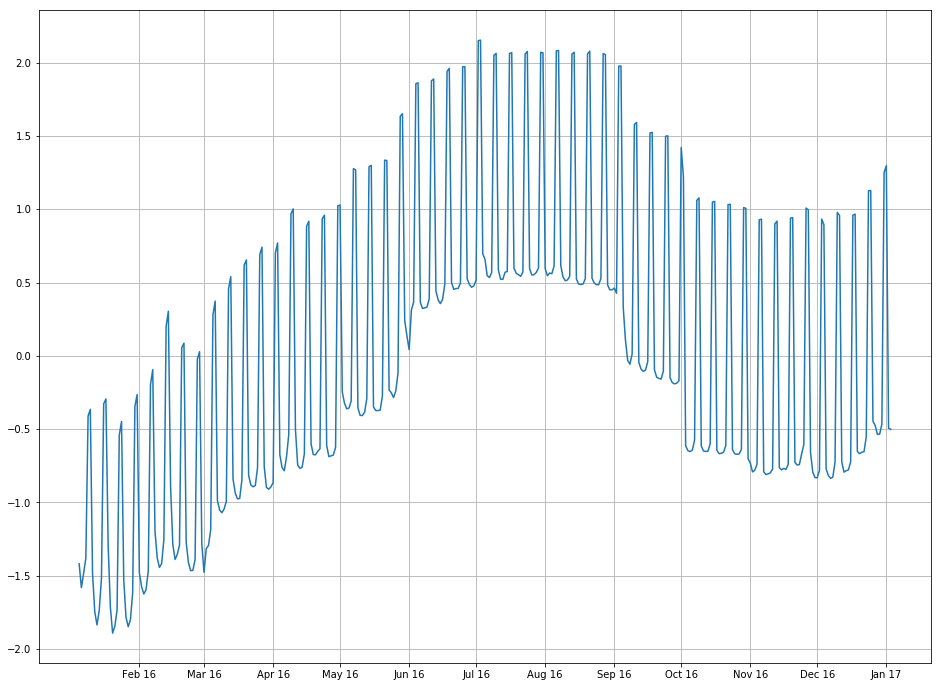

In [72]:
pd.options.mode.chained_assignment = None
combined_array = np.asarray([0]*365).reshape((-1,1))
for id_ in listing_ids:
    one_listing = seattle_calendar[seattle_calendar.listing_id == id_]
    scl = StandardScaler()
    combined_array = combined_array + scl.fit_transform(one_listing.price.to_numpy().reshape((-1,1))) 
scl = StandardScaler()
combined_array =scl.fit_transform(combined_array).squeeze()
fig,ax = plt.subplots(figsize = (4*4,4*3))
ax.grid(True)
ax.set_xticks(first_day_each_month)
ax.set_xticklabels(labels = ['Jan 17','Feb 16','Mar 16','Apr 16','May 16','Jun 16','Jul 16','Aug 16','Sep 16','Oct 16','Nov 16','Dec 16'])
sns.lineplot(x=list(range(1,365+1)),y=combined_array,ax=ax);
pd.options.mode.chained_assignment = 'warn'

Unsuprisingly, we find a similar trend similar to the plots above. That concludes our analysis of the calendar data 